<a href="https://colab.research.google.com/github/xslittlemaggie/Deep-Learning-Machine-Learning-Projects/blob/master/CIFAR10_LH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Course Project: CIFAR-10 CNN  </center></h1>

## Step 0: Import libraries

In [1]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD, Adam, Adadelta
from keras import backend as K
from keras.utils import np_utils
import numpy as np
import random
% matplotlib inline
import matplotlib.pyplot as plt

# Confusion matrix result
from sklearn.metrics import classification_report, confusion_matrix

# visualizating of confusion matrix
import seaborn as sn
import pandas as pd

# upload new images
import urllib.request
import os
import cv2

Using TensorFlow backend.


## Step 1: Load cifar10 data

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [3]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


## Step 2: Get familar with the data & visualize the images

#### 1. Get familar with the dataset
- Each image (x_train, x_test) is a 32 * 32 * 3 matrix
- Each label (y_train, y_test) is a value ranging from 0 to 9 
  
  labels = {**0: 'Airplane',  1: 'Automobile',  2: 'Bird',  3: 'Cat',  4: 'Deer',  5: 'Dog',  6: 'Frog',  7: 'Horse',  8: 'Ship',  9: 'Truck'**}

In [0]:
#print(x_train[0])
#print(y_train[0])

#### 2. Visualize the images corresponding with the labels

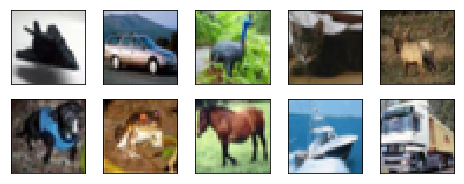

In [5]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
num_classes = 10
fig = plt.figure(figsize = (8, 3))

for i in range(num_classes): 
  ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
  idx = np.where(y_train[:] == i)[0]  
  features_idx = x_train[idx,::]
  #img_num = np.random.randint(features_idx.shape[0]) 
  #ax.set_title(class_names[i], size = 10)
  plt.imshow(features_idx[0])

plt.show()

## Step 3: Data preprocessing

The pixel values are in the range of 0 to 255 for each of the red, green and blue channels.

It is good practice to work with normalized data.

We can easily normalize to range 0 to 1 by dividing each value by the maximum observation which is 255.

In [0]:
if K.image_data_format() == "channels_first":
  x_train = x_train.reshape(x_train.shape[0], 3, 32, 32)
  x_test = x_test.reshape(x_test.shape[0], 3, 32, 32)
  input_shape = (3, 32, 32)
  
else:
  x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
  x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
  input_shape = (32, 32, 3)
  
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 225.
x_test /= 225.

# convert class vectors to binary class matrics
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [7]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


## Step 4: CNN Modeling building & evaluation

#### 1. Construct CNN Model

In [8]:
batch_size = 64
num_classes = 10
epochs = 100

model_0 = Sequential()
model_0.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_0.add(Activation('relu'))
model_0.add(Conv2D(32, (3, 3)))
model_0.add(Activation('relu'))
model_0.add(MaxPooling2D(pool_size=(2, 2)))

model_0.add(Conv2D(64, (3, 3), padding='same'))
model_0.add(Activation('relu'))
model_0.add(Conv2D(64, (3, 3)))
model_0.add(Activation('relu'))
model_0.add(MaxPooling2D(pool_size=(2, 2)))

model_0.add(Flatten())
model_0.add(Dense(512))
model_0.add(Activation('relu'))

model_0.add(Dense(num_classes))
model_0.add(Activation('softmax'))

model_0.compile(loss = 'categorical_crossentropy', # better loss function for neural networks
            optimizer = Adam(lr = 1.0e-4), # Adam optimizer with 1.0e-4 learning rate
            metrics = ['accuracy'])
model_0.summary()

W0801 17:07:02.389344 140643658446720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0801 17:07:02.435252 140643658446720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0801 17:07:02.444186 140643658446720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0801 17:07:02.497815 140643658446720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0801 17:07:02.611635 140643658446720 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 15, 15, 64)        0         
__________

In [9]:
# saving weights
fname_0 = "weights_training_0.hdf5"
model_0.save_weights(fname_0, overwrite = True)

W0801 17:07:02.677339 140643658446720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



In [0]:
# loading weights
fname_0 = "weights_training_0.hdf5"
model_0.save_weights(fname_0)

#### 2. Train & evaluate the model

In [11]:
history_0 = model_0.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

W0801 17:07:06.120401 140643658446720 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 21s 414us/step - loss: 1.6492 - acc: 0.4103 - val_loss: 1.4249 - val_acc: 0.4919
Epoch 2/100
50000/50000 [==============================] - 17s 331us/step - loss: 1.3209 - acc: 0.5320 - val_loss: 1.2420 - val_acc: 0.5600
Epoch 3/100
50000/50000 [==============================] - 17s 332us/step - loss: 1.1903 - acc: 0.5826 - val_loss: 1.1405 - val_acc: 0.5969
Epoch 4/100
50000/50000 [==============================] - 16s 326us/step - loss: 1.0923 - acc: 0.6161 - val_loss: 1.0767 - val_acc: 0.6247
Epoch 5/100
50000/50000 [==============================] - 17s 330us/step - loss: 1.0191 - acc: 0.6434 - val_loss: 1.0453 - val_acc: 0.6357
Epoch 6/100
50000/50000 [==============================] - 17s 331us/step - loss: 0.9545 - acc: 0.6698 - val_loss: 0.9809 - val_acc: 0.6599
Epoch 7/100
50000/50000 [==============================] - 16s 326us/step - loss: 0.8970 - acc: 0.6903 - val_l

In [12]:
y_pred_0 = model_0.predict(x_test, verbose = 2)
Y_pred_0 = np.argmax(y_pred_0, axis = 1)

score_0 = model_0.evaluate(x_train, y_train, verbose = 0)
print("Train Acc:", score_0[1])

score_0 = model_0.evaluate(x_test, y_test, verbose = 0)
print("Test Acc:", score_0[1])

Train Acc: 1.0
Test Acc: 0.7219


**Result analysis**

From the result above, the training accuracy is high, while the testing accuracy is quite low. This could be caused by overfitting. Next, the regularizations of **Dropout**, **Batch Normalization** and **Augumentation** will be discussed to overcome the problem and improve the model performance.

## Step 5: Regularization

#### 5.1 Dropout

- A method to avoid overfitting

Dropout works on a neural network layer by masking a random subset of its outputs (zeroing them) for every input with probability p and scaling up the rest of the outputs by 1/(1-p).

Dropout is normally used during training. Masking prevents gradient backpropagation through the masked otuputs. THe metod thus selects a random subset of the neural network to train on any particular example. This can be thought of as training a model ensemble to solve the task, with the individual models sharing parameters.

At test time, p is set to zero. This can be interpreted as averaging the outputs of  ensemble models. Because of the scaling, the expected layer outputs are the same during training and tsting.

In [13]:
model_1 = Sequential()
model_1.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))
model_1.add(Conv2D(32, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25)) # Add dropout layer here

model_1.add(Conv2D(64, (3, 3), padding='same'))
model_1.add(Activation('relu'))
model_1.add(Conv2D(64, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25)) # Add dropout layer here

model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5)) # Add dropout layer here
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

#opt = keras.optimizers.rmsprop(lr = 0.0001, decay=1e-6)
model_1.compile(loss = 'categorical_crossentropy', # better loss function for neural networks
            optimizer = Adam(lr = 1.0e-4), # Adam optimizer with 1.0e-4 learning rate
            metrics = ['accuracy'])
    
model_1.summary()

W0801 17:34:12.867407 140643658446720 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [0]:
# saving weights
fname_1 = "weights_training_1.hdf5"
model_1.save_weights(fname_1, overwrite = True)

In [0]:
# loading weights
fname_1 = "weights_training_1.hdf5"
model_1.save_weights(fname_1)

In [16]:
history_1 = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 19s 377us/step - loss: 1.8331 - acc: 0.3229 - val_loss: 1.5415 - val_acc: 0.4429
Epoch 2/100
50000/50000 [==============================] - 18s 354us/step - loss: 1.5048 - acc: 0.4505 - val_loss: 1.3811 - val_acc: 0.5043
Epoch 3/100
50000/50000 [==============================] - 18s 350us/step - loss: 1.3831 - acc: 0.5017 - val_loss: 1.2727 - val_acc: 0.5478
Epoch 4/100
50000/50000 [==============================] - 17s 350us/step - loss: 1.2941 - acc: 0.5385 - val_loss: 1.1860 - val_acc: 0.5826
Epoch 5/100
50000/50000 [==============================] - 17s 347us/step - loss: 1.2249 - acc: 0.5665 - val_loss: 1.1111 - val_acc: 0.6079
Epoch 6/100
50000/50000 [==============================] - 17s 349us/step - loss: 1.1603 - acc: 0.5898 - val_loss: 1.0570 - val_acc: 0.6281
Epoch 7/100
50000/50000 [==============================] - 17s 343us/step - loss: 1.1063 - acc: 0.6105 - val_l

In [18]:
y_pred_1 = model_1.predict(x_test, verbose = 2)
Y_pred_1 = np.argmax(y_pred_1, axis = 1)

score_1 = model_1.evaluate(x_train, y_train, verbose = 0)
print("Train Acc:", score_1[1])

score_1 = model_1.evaluate(x_test, y_test, verbose = 0)
print("Test Acc:", score_1[1])

Train Acc: 0.99918
Test Acc: 0.8013


#### 2. Batch normalization
Batch Normalization works by normalizing layer outputs to a running mean and variance. This speeds up training and improves the final performance of the model. The running statistics are fixed at test time.

While batch normalization works as a regularizer, it also benefits smaller models.

In [19]:
model_2 = Sequential()
model_2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))

model_2.add(Conv2D(32, (3, 3)))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25)) # Add dropout layer here

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))

model_2.add(Conv2D(64, (3, 3)))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25)) # Add dropout layer here

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5)) # Add dropout layer here
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

#opt = keras.optimizers.rmsprop(lr = 0.0001, decay=1e-6)
model_2.compile(loss = 'categorical_crossentropy', # better loss function for neural networks
            optimizer = Adam(lr = 1.0e-4), # Adam optimizer with 1.0e-4 learning rate
            metrics = ['accuracy'])
    
model_2.summary()

W0801 18:02:37.170525 140643658446720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_14 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
__________

In [0]:
# saving weights
fname_2 = "weights_training_2.hdf5"
model_2.save_weights(fname_2, overwrite = True)

In [0]:
# loading weights
fname_2 = "weights_training_2.hdf5"
model_2.save_weights(fname_2)

In [22]:
history_2 = model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 26s 523us/step - loss: 1.9164 - acc: 0.3535 - val_loss: 1.5060 - val_acc: 0.4626
Epoch 2/100
50000/50000 [==============================] - 24s 475us/step - loss: 1.5043 - acc: 0.4699 - val_loss: 1.2353 - val_acc: 0.5602
Epoch 3/100
50000/50000 [==============================] - 24s 472us/step - loss: 1.3496 - acc: 0.5214 - val_loss: 1.3666 - val_acc: 0.5224
Epoch 4/100
50000/50000 [==============================] - 24s 473us/step - loss: 1.2238 - acc: 0.5658 - val_loss: 1.2605 - val_acc: 0.5517
Epoch 5/100
50000/50000 [==============================] - 24s 474us/step - loss: 1.1332 - acc: 0.5991 - val_loss: 1.0242 - val_acc: 0.6407
Epoch 6/100
50000/50000 [==============================] - 24s 473us/step - loss: 1.0526 - acc: 0.6266 - val_loss: 1.0098 - val_acc: 0.6469
Epoch 7/100
50000/50000 [==============================] - 24s 471us/step - loss: 1.0015 - acc: 0.6451 - val_l

In [24]:
y_pred_2 = model_2.predict(x_test, verbose = 2)
Y_pred_2 = np.argmax(y_pred_2, axis = 1)

score_2 = model_2.evaluate(x_train, y_train, verbose = 0)
print("Train Acc:", score_2[1])

score_2 = model_2.evaluate(x_test, y_test, verbose = 0)
print("Test Acc:", score_2[1])

Train Acc: 0.99764
Test Acc: 0.8421


#### 3. Data Augumentation

Data Augument is espicially helpful when the dataset is small

In [0]:
train_datagen = ImageDataGenerator(
  width_shift_range = 0.1, # randomly shift images horizontally (fraction of total width)
  height_shift_range = 0.1, # randomly shift images vertically (fraction of total height)
  horizontal_flip = True) # flip images horizontally

validation_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator() 

train_generator = train_datagen.flow(x_train, y_train, batch_size = batch_size)
validation_generator = validation_datagen.flow(x_test, y_test, batch_size = batch_size)
# test_generator = test_datagen.flow(x_new_test, batch_size = 1)  This is not available now. The x_new_test images are images downloaded online later at Step 8 during prediction

In [26]:
model_3 = Sequential()
model_3.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_3.add(Activation('relu'))

model_3.add(Conv2D(32, (3, 3)))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25)) # Add dropout layer here

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))

model_3.add(Conv2D(64, (3, 3)))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25)) # Add dropout layer here

model_3.add(Flatten())
model_3.add(Dense(512))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5)) # Add dropout layer here
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

#opt = keras.optimizers.rmsprop(lr = 0.0001, decay=1e-6)
model_3.compile(loss = 'categorical_crossentropy', # better loss function for neural networks
            optimizer = 'adam', # Adam optimizer with 1.0e-4 learning rate
            metrics = ['accuracy'])
    
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_20 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 15, 32)        0         
__________

In [0]:
# saving weights
fname_3 = "weights_training_3.hdf5"
model_3.save_weights(fname_3, overwrite = True)

In [0]:
# loading weights
fname_3 = "weights_training_3.hdf5"
model_3.save_weights(fname_3)

In [30]:
history_3 = model_3.fit_generator(train_generator,
                              validation_data = validation_generator,
                              validation_steps = len(x_test)/batch_size,
                              steps_per_epoch = len(x_train)/batch_size,
                              epochs = epochs, 
                              verbose = 2)           

Epoch 1/100
 - 39s - loss: 1.5672 - acc: 0.4482 - val_loss: 1.2135 - val_acc: 0.5723
Epoch 2/100
 - 36s - loss: 1.1304 - acc: 0.5960 - val_loss: 1.2712 - val_acc: 0.5771
Epoch 3/100
 - 36s - loss: 0.9916 - acc: 0.6497 - val_loss: 0.8519 - val_acc: 0.7090
Epoch 4/100
 - 36s - loss: 0.9082 - acc: 0.6795 - val_loss: 1.0400 - val_acc: 0.6552
Epoch 5/100
 - 36s - loss: 0.8655 - acc: 0.6968 - val_loss: 0.9610 - val_acc: 0.6696
Epoch 6/100
 - 36s - loss: 0.8234 - acc: 0.7109 - val_loss: 0.7688 - val_acc: 0.7280
Epoch 7/100
 - 36s - loss: 0.7907 - acc: 0.7256 - val_loss: 0.6934 - val_acc: 0.7574
Epoch 8/100
 - 36s - loss: 0.7658 - acc: 0.7318 - val_loss: 0.8881 - val_acc: 0.6909
Epoch 9/100
 - 36s - loss: 0.7339 - acc: 0.7442 - val_loss: 0.9572 - val_acc: 0.6927
Epoch 10/100
 - 36s - loss: 0.7193 - acc: 0.7491 - val_loss: 0.8413 - val_acc: 0.7040
Epoch 11/100
 - 36s - loss: 0.6985 - acc: 0.7575 - val_loss: 0.7406 - val_acc: 0.7460
Epoch 12/100
 - 36s - loss: 0.6895 - acc: 0.7570 - val_loss: 0.

In [31]:
y_pred_3 = model_3.predict(x_test)
Y_pred_3 = np.argmax(y_pred_3, axis = 1)

score_3 = model_3.evaluate_generator(generator = train_generator, steps = len(x_train)/batch_size)
print("Train Acc:", score_3[1])
score_3 = model_3.evaluate_generator(generator = validation_generator, steps = len(x_test)/batch_size)
print("Train Acc:", score_3[1])

Train Acc: 0.90146
Train Acc: 0.8489


## Step 6:  Training & validation results analysis Across the models with different regularizations

#### 0. Accuracy & Loss for validation across all models

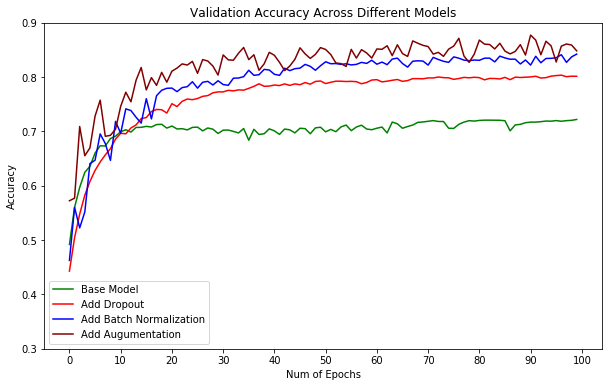

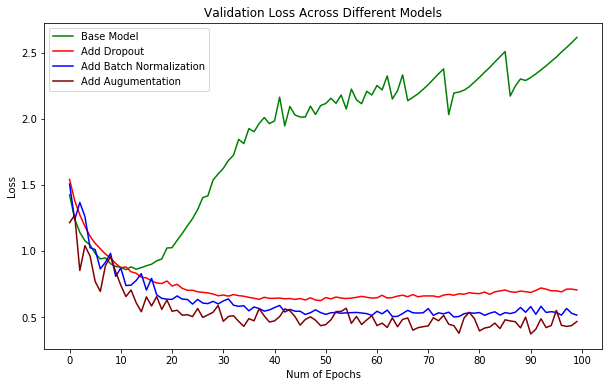

In [33]:
#plt.figure(0)
plt.plot(history_0.history['val_acc'],color = 'g')
plt.plot(history_1.history['val_acc'],color = 'r')
plt.plot(history_2.history['val_acc'],color = 'b')
plt.plot(history_3.history['val_acc'],color = 'maroon')
plt.xticks(np.arange(0, epochs + 1, 10.0))
plt.yticks(np.arange(0.3, 1, 0.1))
plt.rcParams['figure.figsize'] = (10, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy Across Different Models")
plt.legend(['Base Model','Add Dropout', 'Add Batch Normalization', 'Add Augumentation'])
plt.show()

#plt.figure(1)

plt.plot(history_0.history['val_loss'],color = 'g')
plt.plot(history_1.history['val_loss'],color = 'r')
plt.plot(history_2.history['val_loss'],color = 'b')
plt.plot(history_3.history['val_loss'],color = 'maroon')
plt.xticks(np.arange(0, epochs + 1, 10.0))
plt.rcParams['figure.figsize'] = (10, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Validation Loss Across Different Models")
plt.legend(['Base Model','Add Dropout', 'Add Batch Normalization', 'Add Augumentation'])
plt.show()

In [38]:
print(score_0[1])
print(score_1[1])
print(score_2[1])
print(score_3[1])

0.7219
0.8013
0.8421
0.8489


**A summary of the Validation Accuracies are provided below:**

- Baseline : 0.72

- Baseline + Dropout: 0.80

- Baseline + Dropout + Batch Normalization: 0.84
 
- Baseline + Dropout + Batch Normalization + Augumentation: 0.85

#### 1. Accuracy & Loss Analysis for basis model (without Dropout, without Batchnormalization, without Augumentation)

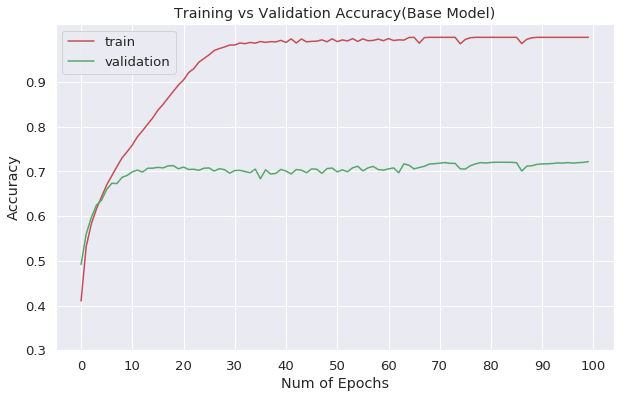

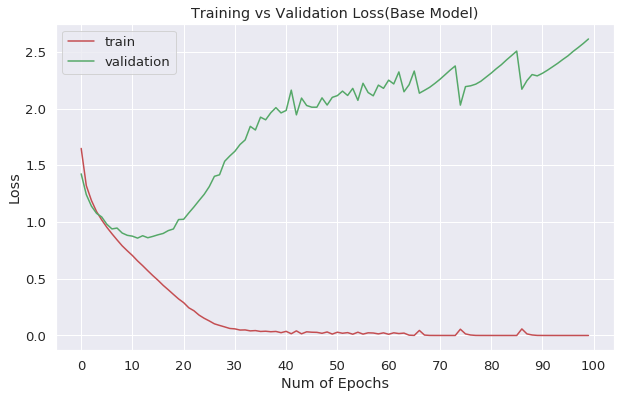

In [54]:
#plt.figure(0)
plt.plot(history_0.history['acc'],'r')
plt.plot(history_0.history['val_acc'],'g')
plt.xticks(np.arange(0, epochs + 1, 10.0))
plt.yticks(np.arange(0.3, 1, 0.1))
plt.rcParams['figure.figsize'] = (10, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy(Base Model)")
plt.legend(['train','validation'])
plt.show()

#plt.figure(1)
plt.plot(history_0.history['loss'],'r')
plt.plot(history_0.history['val_loss'],'g')
plt.xticks(np.arange(0, epochs + 1, 10.0))
plt.rcParams['figure.figsize'] = (10, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss(Base Model)")
plt.legend(['train','validation'])
plt.show()

#### 2. Accuracy & Loss Analysis for model with Dropout (without Batchnormalization, without Augumentation)

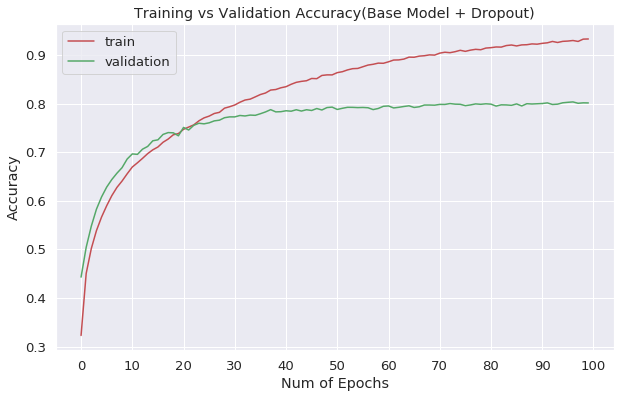

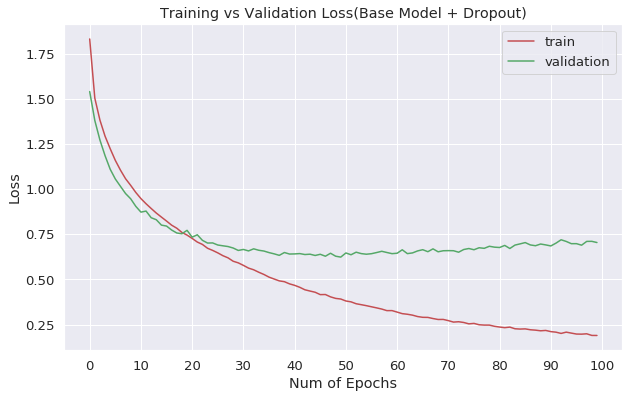

In [56]:
#plt.figure(0)
plt.plot(history_1.history['acc'],'r')
plt.plot(history_1.history['val_acc'],'g')
#plt.axvline(x=20, linestyle='--',color='maroon', ymin=0.5, ymax = 0.8)
plt.xticks(np.arange(0, epochs + 1, 10.0))
plt.yticks(np.arange(0.3, 1, 0.1))
plt.rcParams['figure.figsize'] = (10, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy(Base Model + Dropout)")
plt.legend(['train','validation'])
plt.show()

#plt.figure(1)
plt.plot(history_1.history['loss'],'r')
plt.plot(history_1.history['val_loss'],'g')
#plt.axvline(x=20, linestyle='--',color='blue', ymin=0.2, ymax = 0.5)
plt.xticks(np.arange(0, epochs + 1, 10.0))
plt.rcParams['figure.figsize'] = (10, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss(Base Model + Dropout)")
plt.legend(['train','validation'])
plt.show()

#### 3. Accuracy & Loss Analysis for model with Dropout, with Batchnormalization (without Augumentation)


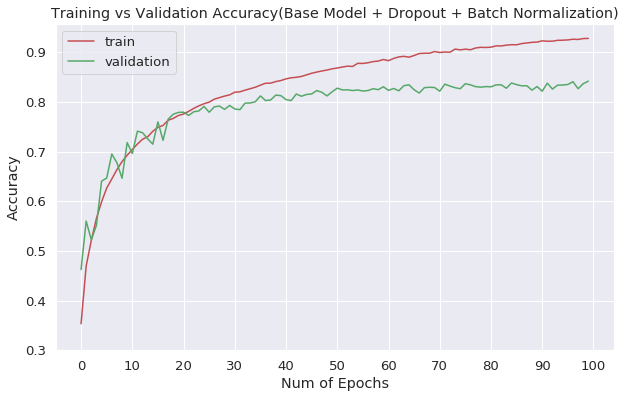

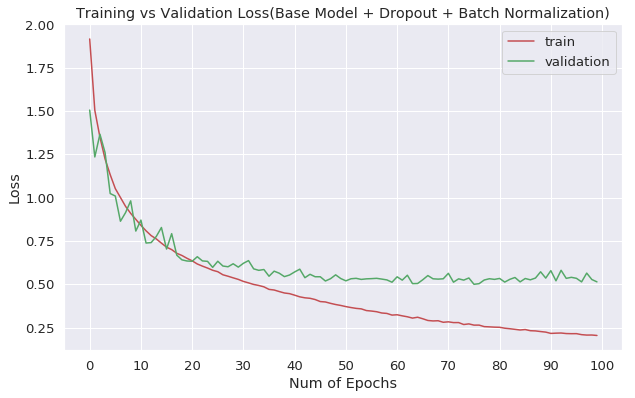

In [57]:
#plt.figure(0)
plt.plot(history_2.history['acc'],'r')
plt.plot(history_2.history['val_acc'],'g')
plt.xticks(np.arange(0, epochs + 1, 10.0))
plt.yticks(np.arange(0.3, 1, 0.1))
plt.rcParams['figure.figsize'] = (10, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy(Base Model + Dropout + Batch Normalization)")
plt.legend(['train','validation'])
plt.show()

#plt.figure(1)
plt.plot(history_2.history['loss'],'r')
plt.plot(history_2.history['val_loss'],'g')
plt.xticks(np.arange(0, epochs + 1, 10.0))
plt.rcParams['figure.figsize'] = (10, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss(Base Model + Dropout + Batch Normalization)")
plt.legend(['train','validation'])
plt.show()

#### 4. Accuracy & Loss Analysis for model with Dropout with Batchnormalization, with Augumentation


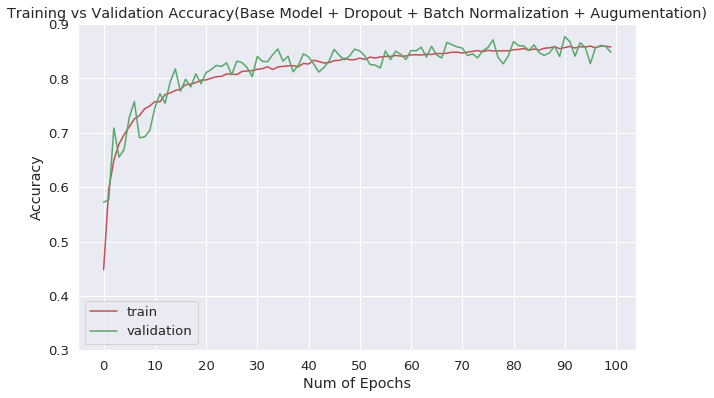

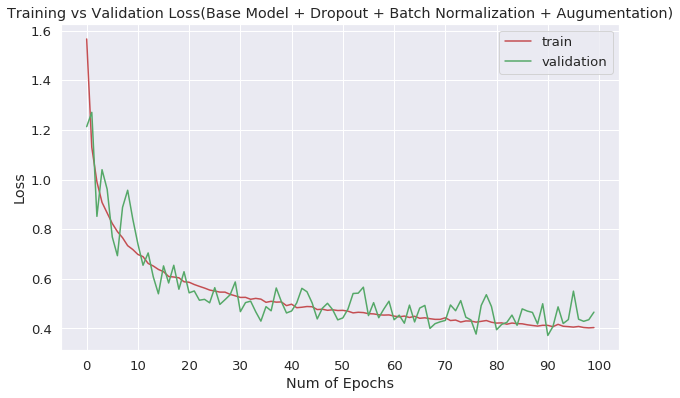

In [58]:
#plt.figure(0)
plt.plot(history_3.history['acc'],'r')
plt.plot(history_3.history['val_acc'],'g')
plt.xticks(np.arange(0, epochs + 1, 10.0))
plt.yticks(np.arange(0.3, 1, 0.1))
plt.rcParams['figure.figsize'] = (10, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy(Base Model + Dropout + Batch Normalization + Augumentation)")
plt.legend(['train','validation'])
plt.show()

#plt.figure(1)
plt.plot(history_3.history['loss'],'r')
plt.plot(history_3.history['val_loss'],'g')
plt.xticks(np.arange(0, epochs + 1, 10.0))
plt.rcParams['figure.figsize'] = (10, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss(Base Model + Dropout + Batch Normalization + Augumentation)")
plt.legend(['train','validation'])
plt.show()

## Step 7: Visualization of the Confusion Matrix for the model with the highest validation accuracy 
(dropout + batch normalization + augumentation)

#### 1. Confusion matrix

In [42]:
for ix in range(10):
  (ix, confusion_matrix(np.argmax(y_test, axis = 1), Y_pred_3)[ix].sum())
cm = confusion_matrix(np.argmax(y_test, axis = 1), Y_pred_3)
print(cm)

[[856  28  28  15   6   1  14   6  19  27]
 [  2 973   1   1   1   0   2   0   1  19]
 [ 37   3 793  13  21  34  85   4   2   8]
 [ 13  10  39 671  32 104  97   6   8  20]
 [  8   1  65  19 774  19  96  16   1   1]
 [  5   4  30  76  22 790  46  20   2   5]
 [  2   2  12   5   4   8 965   1   0   1]
 [ 14   1  18  10  24  20  24 881   1   7]
 [ 50  38   7   4   2   3   8   1 870  17]
 [  8  72   1   2   0   1   2   1   5 908]]


#### 2. Heapmap

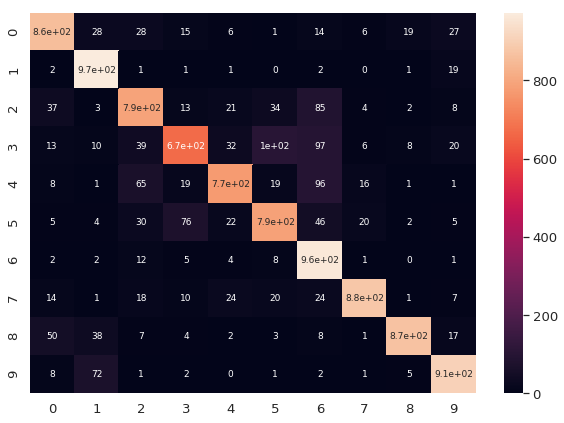

In [43]:
df_cm = pd.DataFrame(cm, range(10), range(10))
plt.figure(figsize = (10, 7))
sn.set(font_scale = 1.2) # for label size
sn.heatmap(df_cm, annot = True, annot_kws = {'size':9}) # font size
plt.show()

## Step 8: Predictions

### 1. Randomly select 10 pictures from test *dataset*, and compare the true label with the predicted label

Prob(Truck): 99.9541%
Prob(Automobile): 0.0459%
Prob(Cat): 0.0000%
Prob(Dog): 0.0000%
Prob(Frog): 0.0000%


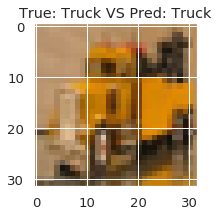

W0801 19:48:55.839565 140643658446720 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prob(Dog): 67.2394%
Prob(Cat): 16.6673%
Prob(Deer): 7.1665%
Prob(Bird): 6.5743%
Prob(Horse): 1.5484%


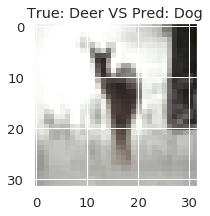

W0801 19:48:56.064033 140643658446720 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prob(Automobile): 99.9957%
Prob(Truck): 0.0039%
Prob(Ship): 0.0004%
Prob(Airplane): 0.0000%
Prob(Frog): 0.0000%


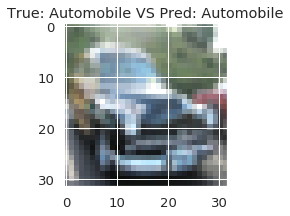

Prob(Frog): 99.9999%
Prob(Deer): 0.0000%
Prob(Cat): 0.0000%
Prob(Bird): 0.0000%
Prob(Dog): 0.0000%


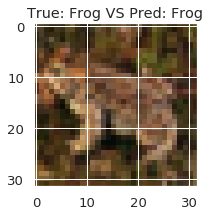

W0801 19:48:56.483473 140643658446720 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prob(Frog): 99.8867%
Prob(Cat): 0.0838%
Prob(Deer): 0.0110%
Prob(Truck): 0.0057%
Prob(Automobile): 0.0055%


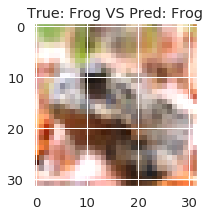

W0801 19:48:56.697941 140643658446720 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prob(Automobile): 100.0000%
Prob(Truck): 0.0000%
Prob(Ship): 0.0000%
Prob(Cat): 0.0000%
Prob(Airplane): 0.0000%


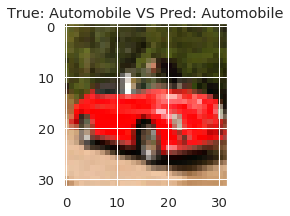

Prob(Horse): 99.9924%

W0801 19:48:56.903233 140643658446720 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Prob(Deer): 0.0074%
Prob(Dog): 0.0003%
Prob(Bird): 0.0000%
Prob(Cat): 0.0000%


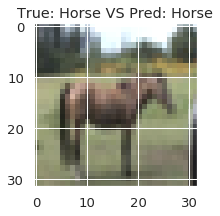

W0801 19:48:57.112215 140643658446720 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prob(Frog): 100.0000%
Prob(Bird): 0.0000%
Prob(Cat): 0.0000%
Prob(Deer): 0.0000%
Prob(Dog): 0.0000%


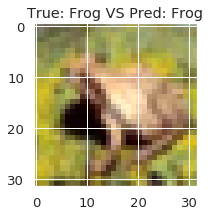

W0801 19:48:57.318578 140643658446720 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prob(Truck): 98.7489%
Prob(Automobile): 1.2511%
Prob(Ship): 0.0000%
Prob(Airplane): 0.0000%
Prob(Cat): 0.0000%


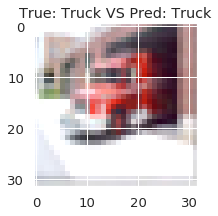

Prob(Frog): 99.7550%
Prob(Cat): 0.2445%
Prob(Dog): 0.0002%
Prob(Deer): 0.0001%
Prob(Bird): 0.0001%


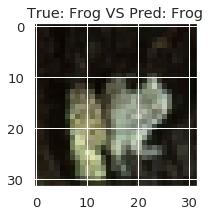

In [44]:
# class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'] # This is defined at the very begining

indices = random.sample(range(len(x_test)), 10)
for idx in indices:
  plt.rcParams['figure.figsize'] = (3, 3)
  true_label_matrix = y_test[idx]
  
  true_label_idx = list(true_label_matrix).index(1)
  plt.title("True: {} VS Pred: {}".format(class_names[true_label_idx], class_names[Y_pred_3[idx]]))
  
  #print(y_pred3[idx])
  y_pred_3[idx].tolist()
  top_5_predictions = y_pred_3[idx].argsort()[-5:][::-1]
  #print(y_pred_3[idx])
  #print(top_5_predictions)
  #print(top_5_predictions)
  for i in range(len(top_5_predictions)):
    print("Prob({}): {:.4f}%".format(class_names[top_5_predictions[i]], 100*y_pred_3[idx][top_5_predictions[i]]))
  plt.imshow(x_test[idx])
  plt.show()

### 2. Predict pictures download online and test the performance of the model

#### 2.1. Download 10 pictures online

In [0]:
Automobile1 = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQVdaxSQfSmw1ygw0l4wBpjMk6xHLDaSSX5YrnkSieMdiedzjqvJA'
Horse2 = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxAQEBUQEA8WFRAVFRcYFhUVFhUVFhUWFRcXGBUVFxcYHSggGBolHRUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OFRAQGC0dHR0tLS0tLS0tLS0tLS0tLS0tLS0tLSstLSstLS0tLS0tLS0tLS0rLS0tLSsrLS0rLSstLf/AABEIAOEA4QMBIgACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAAAAQIEBQYHAwj/xAA6EAACAQIDBQUHAgYBBQAAAAAAAQIDEQQhMQUGEkFRImFxgZETMkKhscHwB/EUI2JygtFSFUNTkuH/xAAYAQEBAQEBAAAAAAAAAAAAAAAAAQIDBP/EAB4RAQEAAgIDAQEAAAAAAAAAAAABAhESITFBUQNh/9oADAMBAAIRAxEAPwDtwgAyoAAAAAAAAAAAAABDABAAAIQwAQhiABDEAgYAQITGIKQhgERYmSEwIgMAq4AAVAAAAAAAAAAAAEHUAmIqVsdFPhurmB29vfRwyte887JffoZuUizG1stStGKvJpI0fbv6pYHDycKfFWmm01TV1l1k8vS5oW829WIxX8iNThi1erJdHpBdF9bmqYeFpunFaruuzHN0n5u8bu75wxmHjiFSlBNyVpf0tpu+jWRaqbz0o6teVzi2Exdb2EKalwxjFJRV87a+DuZfYtVJ3nfLkrfcxcsmphHWaO3oy0i7/MvU8Zf4fuaZs/bVLRRX3NhwmOhJfCvBlxzv1nLCfGajNMZXpVI8j3TO0rlYYhiKEIYiKQMYghCYxMBAABVu4nIxe19rRoRUnJLOzb5fmRqO3d+qcIqMHdt3lbpZfcnIkdCU0O5y7CfqJmlLTw+vqZGp+o+HSt8Xfy9E+4cjjXQLi4kc3n+o9J24U7W952Weei/NCMf1DpJXtJys9Emr5WSd13/IcjjXR6teMVduxVntSmlxOVonIdpb91asnZJXa5v3el/T1MXX3pq1GnKVorOyyy6W5Im61xdjxW8NNRXC838l1Zrm3t9qdBcMX22vTpdcvDU5lit4qju1JuT+Sua7jsVOV5O7fXv5k1aupG2bR30qyk5QlnovBczCf9RbbnUbfS7172a6sS16EY1JVJKK5/vccV5Nhw/E4TlfOUvktEVcNiVCUpvll4W/c9v4l0qbSzeb9PxephMJBzag9G3Jvm+dkYk8t2+Gc2bipOKcnkZzDVm2rTTj0tZ+ph6sYRVndJc9Us+bIUpOnnx3T11eTtazt36mL23Om4UsXw8rvuvLT7mZ2btKD15Pq/xGi4Wu3nFuPXnl3/MzGAVnfi7Len2zzMWaa3t03ZWNpSXvNPpmZ3D1pW95NdLZnNaNbT7N/n7G37IxnZS17+ZrDP6554NnixnlQmmsj1PVHmDExsTCkIYgAiyQmAgAAOTfqpXm66hGTSS07zn84yzu9c/ubzvvQqPFTVS0ujV00tV5o1SVOztb15ehz27aY9wlfuX0Z6yg223r8vH5ljg7svHIjLLRZ/mQ2vGPF0ZfCueVtCxSpy912VtbvTqeVSc7Z3zHSouo+jt+XG+k129lQpZt1FqSdOh1l5IlHALK+Z7yp0oRzf4l0JurpSkoJdim2+vXwMdjnJawS+di5jNqL4VlyMZWqubzb+xdpWOrYd3v+x67LjaTfO1l5/sXZ0VklqyUaaV8uf0Lb0mu1fG8bSXq+bXQ8qScZp8s9Nc1Zltzf2PTDYbid2suo9BYjEST4lHlnd5S5O550sZJ5KKt0fX85l+phL6LLu/0YqVPhnwvTMzxmmt9srTpys5wvF2zV8jJYSc0s9enLzKmyayz5q1pR52/+Gdw2HU86d2lqrHK31XST4u7Fxbk+FxtfLJ6G7bIwzVs/P8A2a/sfZkJySbs8rSXXvN42bhnFcMs+/kyYzd6TO68rmHi9U79S/TldZnjTpep7pHpxmnmypiGI0hCGIAEMQCABgcp3/rv+MfHGzsrc7x5GmSqrjf54m5/qtUTr0mo/wDbV5W5yu0n5J5eJpXsfi0TOTvPESlVTTV87ng9dLknqFOF9EAqskmrrP7/AOgo1rPLyLGC2bUxFRU6MHOb5L6t8l3nRsDuFh8LReIxtTi4IuUoxyj3K+r+40W6c0rVXa/Mo4iUnly+RexNVTnKSjwxu7R5Jcl5EXRTX3GhiJQep51FpYt1M/X5dTxqWKixSdrHnVty/LjjUyK+JrWIr0oRUn3F6lKzaMJSqyTy6l11Ws1qVGWdZKOWRisZG6u15kqFZN3kXkozsrpdCoxGExDpy4r66/nhc2vc/HRli4U7vtXSXVWuvMwWPwPCirszEOlUhU5wkpLvs768jFkrW7HfdkbOs3H4U7xfjy+pseHhlZmE3b2hGtSpVrWU21bvkuJfRo2RIv54zTH6ZboSAYjq5AQxBSEMQAIYmAAAAaVvZsari6FD2dJKc+1O791cCUV5LL8Zzrauya1CThUg0k7X5eTOyYXbVLjpYZyvXdJSklpG0U8+l8zE76bZwtDgVWnGrUUuJRy7KXN+Zzs9umOXpyCpRknwyVnrnqkbZuRuvSxMpuvO0YNL2cfebel3yX5yMbvRvQ8XJKFKNOy7TjbilK1s30SyRjdnbTqUGpU6ji1o0+drX8TLfdnTvOzdl0MNHgo0owj3LN+L1Zrv6lbThHBTpKpHjlKKceLtW1eS8Dmct88cpqp/ESulkvh9NDDV8ZOrNznJylJtyb5t8zW2Zjd7oll48zz/AIjIKs0suZQqVr35BXpVr5nj7zuedssxxlkVHtG7ueeIpJ26EYSfXInNuxlpGjSu7F/+GurIqUJZ+BkIStZ9AjHYvC+ylFqV4vos088mvIvbGrUqyhRvUWIqVODhkuxwyS4JN/3ZNa2zuixjaMZWzaXVdHn9behDBKdKfFS7U17tSS7Ubpq8eSyb6m5YzZVWnVc48LveL5/RnnUw9nfkzI4fZ/s7tu75+fIWIpZGa1G7fp1tWTwWKoqVp0Y+1pt524GnbwvFerOs4St7SnCpa3FGMv8A2Sf3OBbgYlU8dCnN2hWvSmusasXFfNxO/YWHDCMekYr0SRrFyzeohiNsgQARSEMQAIYgEMQwPn2OOqe1dTifG9Xd3fmQxs5TlxSldvVt3POnC6utVci36HJ6PCnWg1LIcE/iPWpFt5I8akmiG3m1mPjtkRmzx4yoVes1oVVByfcWHSvmTdlFNdREqvVhbLoV61ayLk43uzE4h5molZDByVswqVVoivh2rE6qsTRtKlKz1MnhavEjFUmZCgSrF7CzzUZfnQynBYwkrrNZc0Zn2rnFSXO3rzAl7ysln1KtRJJp63y/LlqnO0ku79hYqN1fl5BWNdSVGrTrRWcZRkvGLuvofR2z68alKNSHuTipR/tmuJfJnz1Rs4yi9VmsufNX78/U7buRKK2dh2pcS4Em3qnd5eCbt6GsfLnm2AAA25kACCgQAACGIBDEAHz1Tyjf8uecI6rwFS6XHTb4rL8ucXoOULFHErIu1KuqKFepdArzi8tDybCcmkeMpepUentfQ8/aq1r89CNK8m7K7+RXdOTbXMrKzOsrOzzMdVjeRvu6v6c4nGWnUTpUf+c1a6/pjq/p3nVdibgbOwsUv4eNWds51Upt+CeUfIrNr5xw+WTLFVJnTf1Z3NjRaxuGpKNK3DVjBWUX8M0lyej8EczWjCvJRMhhZJLvKsMyzShzRKsWajdstD0wGJlBWfuntg6Ku+J9kyeCwsL2aummrP5EaY2ri1dO/pqe8KvGrrT6ep7YvZqv2dPoyph6TWXPl18Qhqq4ybSv/vqdp/TSrx7PgmldSmmv8m/o0ccp0byV9L2vl6Nfc63+mddPDuKVuGpLnfVJmp5ZzbeAsVKzUuWkvPR+v1GzbkQhiYUgAAEIYgEAAB840nlfml/os2WvmVKS0LkpW0t49xxelTxb7fiUsVLPLrY98S+0ivXpvK3UJXnN3VjwjSlOVkm28kkrt9yRvu7O4GIxNp1U6NF85LtSX9MX9XbzOobC3bwuCX8iklPnUl2pv/Ll4KyNRi2OVbt/prjK1pVkqFN8551Ld0Fmv8mjpu7+5eCwVnCkp1f/AC1LSl5co+RsAysWpJkkQRJFQsRRjUhKE4pxkmmno09UzhO+W4FbC1OKhCVSjJvhUU3KHPhaWq7zvKIVqSla/J3BLp8ryvHJ5Z6d56RrXVkztf6hbkwxVGU6UUqsVeLStpqu+5xSlhuCbjPJrKxGmQwE80mZGNRx53MMnwvMsPEPJciNNswdZVFe+eSa6o88XgYt3iszCbPxbTsmZtYi9rPx7yaWVHD4NOaTfM6ZuhShRhaCyfP6o517WMe1fM3nd7EJ0E2+0r5fR/Qb0WbbdVkpxcHpJNPweRT2DjHUpuE3/NpSdOp1vDJS/wAo2fmeFLG5Xz9DXtr7RlgsfHE5uhXilUXK8cm/FKz9epZmmWFb0IhSqKUVKLvFpNNaNPRokdHICYxAIQxAACAD5p9stCH8S+JLkeUk9TYN1N2KuOrLhVqUX258or7vuOL0WvPAbGrYusqdGF3zfwxXWT5I6xuzuZh8GlOSVSv/AM5LKL/oXLx1MxsjZVLC01Soxsub+KT6yfMvGpHLLLYAANMAkRGBIaIjQVNEkQTJJlQ5q6Ocb57g+3/nYdJVYp9nRTikrL+7U6QJxJYsunzLVwcqc3CrFxa5SVnfwZWd4tne98N1aWLpStFKsk3CaWafR9U81Y4lj8HUpT9jVg4zjyfyd+aMtztUpYmzyMzh8RdZGBxFC7usmtTK0cbTtHiVopKM2tcvifVaBV6vWutTM7n7YhTcpVZNt2jbm7fsn5Gv45WTdNScFztbLqylhZNVYp5STTWfWSTz70SzcXeq6Ls/eqVTGypVW40VlFRy83dZvM2beTCRr4WSjnwrji++Kd15q68zl2048MpYhWvGEbf1SlaNvK5ve420vbYZOpdLicZcXck9fOxzda2HcfFKWDhDO9Psu/rHys/kbAa9uZSj7OrVj7tSo+H+2OS+bZsB3x8PLl5oYhiNIQhiAAAAPnXY2y6mKqxoU1ec8u5LnJ9yR3jYmyqeEoRoU1lFZvnKXOT8THbm7tQwNFXSeImk6kun9CfRfNmwHORvLLZAMRpgAAAMAABgAASRJECSAmhkESTKG0a3vVu1SxcEpRXFFuz7n3+NjZSM9BYS6cV2vuHKnSlVpTfYV5Qlra791rnZaGlYWh22p5LPTVeKSPpLEYGM4yjL4k16q1/E41tDYjw9ZwnHtRdru9vFdcs79+iOd6dce2vTw86fDCUpeznG8XmrpawferOy/wBMMJRXEpxa4o37MtLL3fO+fkdH2dhaM8P7GpBXaWfPnwyT1yuajiN3qjqNxSSi7Ta+Fx1aWvf5ozM5enS/nqbZbYq9tTlSq01wSVk+at2eLyZsOG2Yo4aOGpt3lLhi9G734pejbNZ2JjuCU6apzaTu6llwp8KTvpbTqzfNz9mydq9S+jUE89dXfn4kku1yykx/rYNmYeFGnCjBWhCKS8uvfz8y4RcSR3jykIYihCGIAABE2AAAyoEMQQAAAADAAAAAY0RGVUkxpkRpgTTGyCZJMqBlLH7Lo11arTUu96+qLoNE0S6YJ7s0brhcklosnY9qG72HjJy4W27XvJ2fikZdgThPjXPL6px2XQT4vYxvyur28E8kWwA0yBAIoBAxAAmMiQAAIgmIYBSAAIgAAAAAAoGIAGAAUAxAFSQ0JDDKVwIjuWBgK4rlAACAABkQGIBMgGIBAAAAEwGBGiAAAQDERAACAYAAQDEMqgYhoBjEAQwEBQwEADAQFAJjEwIsTJMiyBCARADFcAPcQAFAgAKBABEoEABANAAAMAKAaAApgABAAAaAJgAAAAACYAAMiwAgiJgBAgAAP//Z'
Airplane3 = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxISEBUPEBIVFRUVEBUVEBUQEhUQFRUVFRUWFhUVFRUYHSggGBolGxUVITEiJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGBAQGi0lHR0tLS0tLSstLS0rLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLSstLS0tLS0tLTctLS03Lf/AABEIALEBHAMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAACBAEDBQAGB//EAD0QAAEEAAQDBQUGBQMFAQAAAAEAAgMRBBIhMUFRYQUTInGRBjKBobEUQlLB0fAjM2Jy4YKi8UNTc5LSFf/EABkBAAMBAQEAAAAAAAAAAAAAAAABAgMEBf/EACIRAQEAAgICAgMBAQAAAAAAAAABAhESIQMxQVEyYXETIv/aAAwDAQACEQMRAD8A+bgKaR0pAXpuEACkNRgIsqZAAU0jDUQamABqINR5UQamSsNUhqsDUQamSsNRBqsDUQYgKw1EGqwMRBiYVhqINVgYiDEgrDUYarAxG1iAra1WNarGsVrGIAGMV7GImRpiONTTA2JXMgV8UScigUmSZh1czDLRjw6Yjwyi1UjIOGQnDLfdg0DsGls9ME4dVPgW87Cql2FT2NMJ0CrMC23YVUvgT2lkOiVTo1qPhVD4lQZzmKosTz2KksQHlaUhqMNUgJ6IIapDUYaiAT0QA1EGowEQamQA1EGow1EGpgAaiDVYGog1PRKw1EGq0NRBqehtWGogxWBqMNRolYYiDFaGI2tRoKmsVjWKxrFY1iWj2BsatZGjaxXsYkAMiTMUSsiYnIYQoqoCGJPQwqyHDJ6DDrO1cgIcOnYsMmIIE9Fh1lcmsxJOwqA4Zbv2bwhVOw6iZquLCkwiodhF6A4ZLzQq5ki4vPS4dKS4db8kCWkgVyoseekgSc0S38RCs2eNaRNY8kaodGtCViXc1MnjA1M9nQsfNGyVxax0jWvc2raCavXRVAKSxXoml7S9inCYl0Bst0dE47ujdeUnqCCD1aVmAL6LjcN/+j2WyZozYiBp23dloSs8yAHAcwOa+egKfHdzv3Dzmr18oARAKQEQC10jaAEYC4BGEaJwCINUgIwEwgBGAtLs7sLETC44iRwLqYD0aXVaSy1ofjaUso0EBWBqkNRtamSA1GGo2sVjWICtrVa1qNsasbGlTC1ivjYpYxMRsU04mKNOwxoImJ2Fizq4YwwWrhq4hIwsWlh2rHJri0IIGnZPxYUhI4cLVwzuC5sq2xWtjFUq3QDdXqCFG2jMnalnxp+ZhCVetMayyhKSNKTRrQkSc61xRWViI1l4lq18SsnErfFjWZMEo5OzJRwWsS8eGosqtDEWRXomv7L+0j8GXANzNcQaui1w0sc7FegTOIkwGIcXlphc4knu/C0k7nLqPQBef7tdkU/5ze57HK6023ezLXawYhrujxlPq2/ok5/Z7Es/6ebrGQ/5b/JJxlw2JC0cN2xMz71jrr9UazhdMt8RaacC08nAtPoVIavTw+0dipWAjpqPRytYzBzfdDT/AE3GfTYpf6a9wa36rywajyr0kns7GfclI6PAd9KSk3YEo93K7+11fI0q540rjXtMEDlaSToBXovJe1mC7vFvoeGSpWeT/e/3h69ZhngAWdwAOpSftlhM8Ecw3jeWO/tfqPRwr/UuLwZa8n9dPlx3h/Hi2tVjQpDEYYu9yJaiDlGVGyElII7xNYeFzjVfqm8B2STrX6/4XpsB2WBwWOflk9NcPHazOz+xWu94H1I+i0O0vZxrYXTRE+AW5rjmBHEg76LdgwwCYdiWCKU2DlY4OrWjluvPUeq5b5st9OieLHTwMSehS0LE5EF01zw5Cn4CkIk3C5ZVrjWpC5aEMoCx45VeyVY5YtZk2GTIJpVntmRPlUcV8lz5yqHvBVbnql71cxRckypKZHI9LyPWuMZ3IniVl4hacxSMzFtGVrLlalnMWjIxUGNXstvIiNEI00IUYhWqSYiXd0nxCibAgmf3SIRLab2Q6rBafj+eyF3Zzxuw/DxfRLnD1WUIUXcdPVaIw6sECNpZmCbMy/4pIvQUKC0o+0ZW7gOH9Jyn0OisbAidhrBBGlLO446Vyr1GGZt5UnY4RIx8DhYe2qP4h4m/MBKYY7fvgnYTTgRwK823Vd8nTx5wsWayCGjcZvl0VWN7Qw9d3HFZ5sOo6lxXqu0vYqKd5lbiJGB7i50YDXNBOpynQgXws76Us8+y8URDGPMle94coHxBNldWPll91zZePKeowsNhS4gVVixfHUjTnsV6Ds/scDU/NauC7ODQABp+ytOKEBLPzWqw8UhbDYMDgm3ubG3M8gAc/wAuZS2K7QDTkjGd91X3W1uXnhXLfghbLoO9cHHNmBrbSvCPideq5ssnRjijFzlw3yRloPJ5sA0fw8lk4zGZm91GKZdmuNbfqrce0ued6+71HNVsw638eEn/AFXP5PJb1C0caZjiV7IVeyNbXJnIrjjTDWqWtVrWrO1UjmBXNQtajAUVcEEZQgKSkYXFUvKtIVbgnCpeRLyBNvaqXsWkqLCEjUu9i0XRql0SuVOma+JVGFaZhQ9ynyLi8g2BWCBaTcMrG4Za82eqzBAjEC0xhkYwyXM+LNjjI2JHkmWPd/xonBhlY3DKLZVSWEzJzF/3BAcvFtfL/C0hhlDuz2np5afLZZ3r1Vy/cZvh6/VRJJGAbcBpx0+qW7X7Exepge0j8IHdv+Zo+oXicTBM2djJWvDzI0ASBwJ1Hu3v5hOXL7K6+n1qDgnmFZ7HNbq9wHxH7Cl3arB7vi8v1XHZuuyVrd44igaHzRRRALOb2i2r259PNWM7SbzHqqk0ne2tI9rG53kNaNyegv6A+iycRjnyatuOPLd/9R5OwH4QBr5kcipmnZIWnL3jwHBrRqKdlskbfdGp6pXEdmTzO/iSBjPwx+J583HRvoUtWi3TPm7bhi/htIBGlcB/ceLunqqmdoFxu/itpvs1hsmTuWkczeezuc/vX8ViS+yEomPcOEcVaF7y8l1WaaBtemuul67LTHHGM8ssmlBjwB4tRy3Pw6p6EgkDMLOzavTq66voF4ztDESYWVsGIc0Oc3NHkcDmbdWAaJ2TmE7UBG9jpqPjxC019I5fb2b4KNfvVcI1mYPtq6D/ABDa719ePx9Vt4d7Xi2EHnzHmFN3Papq+lQjRhivEaIMU7PSkNRBqtyIgxLZ6VUupXZF2RGxpQWoCxNZFBjRsaJujVbo08Y0JjRyHFnmJCYVoGJD3SrkXFnGFD3K0TEh7pHIcXnBCrGwp0QoxCr5I4kxCiEKcESMRJcj4kxCjEKbEaIRpcj4lRCjESZDEQYlyPiXESS7dwTpMO9rG26gWDS7DgdCdjVrXDUQalyPi+Zxdi4/NrA5wv7z4xX+5Pt7MxLWB5hcBvQyvI82g2PRe/ARAJchxfNmYsg+WiZweGgkkBlc9gO4jcA0n0sDyXuMZ2XDN/MjaT+L3Xf+w1WBjPZHjBL/AKZP/sfmPirmWNTcco9BgsJGxgbEAG8Mut9SdyfNMBi8bBisVgz/ABGHJxvxMPk4aBeu7MxrZoxIwEA6aitRv5+ajKWKxsq4MRZEYUqNr0VxOAikrvY2Pq67xjX1e9ZhovPv9io3yyzSSut5tgha2JsY2FDW9AB11O5XqlNomVnoXGV897R9nMVhwZGETMaCSW1G8AakuaTRAHI2kuze3hoWv13FGt/35L6RjcKyaN0MgtjxleLIscQa4FJ4n2ewr4hA6FgY33MgyOaTdkOGt6nzvVazy/bO+L6I9m+0TXUJf/YfmP09FvxPa4ZmkEcwvEY72Mmj8WElzj/tzeF3weND8QFn4btmbDPyStfE7k8UHeR2cE+My/GlyuP5R9KyqaWJ2X7SxyUH+E892n9FuBwOo15ELGyz21ll9IpSGrrVOExHeAvA8B/ln8Q/H5HhzAvils9L8q7KiC5Gz0AtQ5VaopGxpUWqC1WkKC1Gy0pLUOVXEIaT2NEO7Cnugl+96ovtHG0+y6Xd0F3dgKl2IQ9/xR2XS8tHNRolzMo70o1RuHA0KHV1SnfKDMUao3DeYdV2dqVMp4+q4yJ6GzXfN5InPA35JJs1Iu/B3+CWhs3naiFJMSckXfI0ezd9VDSAKGgGwAoD4JTv1BmRotnO96lEH9Uh36nv0aGzhk80Jm80mZ1PeXojQ2cE6j7SlO9CjPwRobO/aQq8SY5GlkjQ9p3a8Bw9ClQ7r8kReEaG2FjfZVl5sK90R/A63x/PxN9T5JSDtHGYQ1JG4s4lgMsZHE2NW/Gl6nNzKkP10Por531e0cJ7hDB9qnGNH8NzIfvl2hl/ob/QeJ47cStsYhKPeoDvJRdLlpwT+aITdSkmyKQ/n9UtHs6ZOpQd91KUM6jvkaFp3veqkPPNKNlR94jQ2ZzHn6KQepSzZkXeXuUaG4x+9U96lBKjcXbkHzIWmmZgSqTMlHOI305IrNdP3vyRoGu94KDJ1ShcjzCrs9Bsg14lRd8OvqlQ8cvnoi7t17H6/NAXmX92udMlC4hcb5I0RrvkPepYg8vJVl9IB8TqHTeSRL+qHvEaGzxnXd8kc67OnoHu+Xd6ku8UhyQOCVT3nVLMFmue1q1+Hc05S2yQCMtoMfeLu9URYZ7jVEeYITH2Fo0c43epGyVsElRh2l7qHqUU2aN2V29fIpyLDMjtwN1z3PRDicRdHS6rnpyKnl2vj0TEx5lR3vIrXwYAbmoDnX6JTtaCw17RVmjw31BKJlNlceiZk6oe9QviIsOodPNFFh71JG11rf0VbidVwlRmcHdc2Bh11I20KgQNokk1zAuuV8ktw9V3fhSJlH2dtZg6/hqFH2Rx9035/RG4NVZ36kT9UtI1w3Q5jyVdJN96j7xIZyiD/wB7oCqPDG27EOA0NXfGgm8ZE/wmPZ3A6URpV9R9FD3Na0ObobG2oCGadxIymrHi5WNRSz5W1rxkjPYXE0N7PrxCKF27SN9+fPiiw2cOMhA3sja83TZBiXjNbQWu+8D+S038M9HfsAy2Ha3uNflajuQ2wRe2pGmv0VWBxeW287saFFiZ8tUdCKc00dFHfpWosEDbBaTqDY3REFrcvHhrp+oXYGeMBxcaBNBv6LsaDkDmuJJdbRlFga8Ut9nrpW45QWPb1FH5gq1l1Y93kTfqlsSK1eSDQ31v4jr6Kv7XTasVYO3HlafsHjAaDmgaXYu+HJImDnY4g72E12dNd16c0rjWvzWeA1N0B5py3eisiHYcN1JtvTdUyNANA35iqR4GUXz81ZjcGGeK7G41vn8lW++0666LmF25BAurrRNySx5KDadQpwaR6qiGQuaWF5rcCrs7C9FTESQQbsbA8ddQj37Ho7C+Mg22jl3Hi122KOOAccp0OuvL8vzWfJI29q0Ggquqh0x4E1+SOJcmpHMwggkDyIPxHyVkpIrXMP3wWRC4HUnjxpMPlaeIvLpyKVxVK1B4tWOArgeZ3AUNxBJ1NGqOhHwKzYMWMtnerq+SCXF3btTfy81PGq5RuQT7ggEHchU4gFpBFFp+iyocZoASb5Umu/sCrvNqPolx0N7aRlqm7gixvtxT8Dw5pHMUVg4eRzas7X8E7FNp4dCTX+VFipQYsMDnMc420eEu089NiLKRwmNLTWnWxy2T+LkFDvK83VRr89lDcPFJHeg2otoV06hXLNdpsu+lGJdm1ycLzN5jyS5nIAykk+o1+ipl75hMQ8QGu12OYS7Ynh4DgTYzFrTk328/grkRa0WxkN3PE0dPQj6K9rQA3cX95uvwKz2SgvaDsNwTpY4FdO1zHAA5mOIroTpR8uaWlemhhp2k5TXEG9QVZLhNCGOLdtLsE86SeHhJcPFWnDgdgCufi3OeYnGsuhIrUA8v3up+ej/qXPc1wicQ4f5+RXYkuDt3C+ABrlw0OyoxD8tEXlOvPWt6803FC54zZj1HI+qreuy18M7C42nWduSjGYqzbSRe44KX4J4dQbd8qKUlFGjvet2FXXsrakzHgfyQOkJNndHlaRoDm6aoJYqPH46FOWFZRMmF66810srcwoED5+abPZTjHnacx4ABKQwPOgGoF8uPVG4NU2xsJPiLg7SrNetjVVtMjTd2SaYQfCCdTolnse6zVlvvbc/15JjD4ygB6gjRTYcD9qfYzG65pguY6PeiTZO4vqullDrAAOx9EoweLol7M9hqzWHabXd0UWNkcaeaoEZb16alLtppIFC9L1IIPTgrsfEaAZVH3gOfCgl8n8ODWvO4B3JbxNIZoRQLTdb5ieqzi97DXoodiTlqzruq0nZmWYbsBBcPFQ+iAYgVoKOmtqiOWqykmuewVc01m9PgrkRaZedd/wB8VXfVUd4VJeqkJaXKcypzLi9MludSHX/yl864ORoG3SXuSCNqH71V0UjyMw1o6cD8lnF5VsExANfEKbiqVouxJzeJhGlEUfVTPi2ZfCTdihr6qvD9pkNPMe7YJWe+ayT1UTFe3pcPi45ImseASDRzDbqCiliaxpbG5xADXENFmuIPw/JeefOCBl0IAB5Hqr2zvawuAaLbROazr0U3A+TSil8TXMcC0uptXmF8HD4FN9pRAgMcHOB2ppdtrw1Gq89gjLYewEm9LIo3pQBTg7WljdUoJe4EAHhexHDdK43fRzKa7RmY6MtDLc124Gu9eZ2Q9nvaH+Ib6Ev1I57oftcTQQLD9y4a+LjrxH6oImukIp+ayC8aDQe7uq+CPxYoB+gBF8q08lZ2uyMOMhuzGMgsaFvIX5ehWNGHhxcbNOrgFszyMdH4xuQOJDjrXUKb1Yc7ZEctvaRZF6hxsfvUrTmwbybjJLSPxVl/p31/ys1uFz05jmtrdvIDh1PmncNjpWNyiN3PbmN9U7+in7bsO4/uK852t/Pf/cpXKPH7VmCHh5fmnZ/5jfJv0XLld9l8NLsz3PgPok+0Pfb/AOMfUqVyynurpLAe8filcX/Md/cVy5bT2zyHh91Q/f8AfNcuR8g7B7p+C6b3wuXKQTxfD4pIrly1xRk4LiuXK4mocuXLkySpeuXJG4ISuXJkFXwe6fJcuSvo4KHf4FUPXLkodQ1Xu/l/FcuSy+Dh7sf3fj+YXdubs/0/Urlyyn5rv4skbrQ7H94+S5ctM/xRj7aWL3f8Pq1djvdZ/wCMLlywnw0+yWG2d5/mVsHh/aPouXJ5ni//2Q=='
Frog4 = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQJuJPv1HtnggFtf9i2YwFAKJe4_W_vFzkzHKYBVxCEsRX1V6jG_g'
Bird5 = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT-xY90TBNfOcUJywzVll_oLt1aSHl3bKPiUcazGFGppV2wpmJR'
Dog6 = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxIQEBUQEBAQDxAQEA8QEBAQEA8PDxAPFRUWFhUVFRUYHSggGBolHRUVITEhJSkrLi4uFx8zODMtNygtLjcBCgoKDg0OFxAQGi0lHSUtLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLSstLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIALcBEwMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAADBAACBQYBB//EADkQAAEEAAQEBAQDBgcBAAAAAAEAAgMRBBIhMQVBUWETFCJxBoGRoTKxwSNCUtHw8QcVM2JyguFT/8QAGQEAAwEBAQAAAAAAAAAAAAAAAAECAwQF/8QAIxEAAwACAgMAAgMBAAAAAAAAAAERAiEDEhMxQQQyI1FhIv/aAAwDAQACEQMRAD8A+r5l7mSAxKsMSrhNHrVrSQxCsJ0Do5alpXxl74yQDNqZkr4ynjJgN5lMyV8deeOgBvMpmSnjqeOgKN5l7mSfjr3x0BRvMpaU8ZTxkBRvMpmSvjKeMgBrMpmSnjLzx0AN5l4XpM4hDdiggB8yKhkWe7FoLsYkM03Sobp1lPxvdLvxvdS2hw2TiEM4pYb8d3Sz+IJd0Pqzon4tLS4vusJ3Ee6SxHEu6T5EPozekxo6oPnx1XMycQ7pc8Q7qHyleM6mTH91nYziXdYUnEe6QxePvmofKHQ1H8V13UXLOxWqiz8o+qPqn+Yd1duP7rkBiz1RW4wrs8iMOrOvbju6K3G91yLMaUzHjSjyIOrOp853XvnFzYxndTzndHkQdWdF5zup5zuuc82vPNlPug6s6PzvdTzndc55orzzRT7oUZ0fne6nne65sYgqGco7oIzo/Pd1bzvdc0JyiNmKO6CM6LzvdTzvdYAlK98Uo7oOrN/zvdeHG91geKV54pR3Q+rN/wA73VHY7usEzFDfOUnyIOrN52P7oEnEO6wXzlLyYgrPLmRpjxs3pOJ90s/ifdYMk56oBnWGXOarjOhdxDugvxywjiCquxKxy5maLBGvJjUtJjVlSYjul34hZ+VldUab8d3S0mL7rNfOhOmR3ZLg+/Epd+JSbpkvJMnRUbkxXdKyYhLPlQHSIM3kMmZRJZ16nCad8AiMCEwpiNT5WdHQIxiM1qjAiNS8rH4yAKBqsoCjysPGQBe0rLxHmF4yUvQFFYBV5heM9a1Wyr1iM1qfmF4wTY0ZkSPDDegFlacGEawgyHXk0fqrxzeQngkIw8MkcLawkdkzheCPf+L9mO4Ob6LcZjGhu9dAFI8VZW8REEmfDbKsyO+TQP5qx+GYz+GR49w0/wAlrCTT3V4X9E9Chy2J+GJR+AtePfKfof5pDiHApom5iA4DfLrS74uQZHg6XSTxQ0fKJXpOWRdvxT4aZMS6J/hG/U0i2/8AWtvZcdx7hT8M6nEOB/C4aX8lyZrJG6hnySpd06BK8pZzis6wbHDOguxCWc4oL3FKC7DEmIS7p0vI4oBcU1iS8ht0yo6VLZlC5WkQ2EdKhOkVHFDJVQmnrnIZcoSqqoSS1FFExH0WNMxpWNNRrmaO2jLVcIbSrAqYOhFAF40q4CmBSAL2l6ArZUQKUCuFMq9ATgqXYmIW2gMCcwo11TS2FPcZxJzAI4qbWr3c67pWHEOe8OJJAP17lZnFZHQS1/FqCdj2K0OH4jLA6VwoMaT7ur+y6ccqORaHI5c0xaCTkALtgA52w0H69FpYriUOEiL3OGfqeRXJfDeJkmEkjKt0ryb+gJPPQIHGfg6fGzNl8xRY3KGljSIwT6iAQQCeZ3NDotuPZjyaPpnBOJtxUQe0Xpr0tOsG/wA0p8McKZhcPHDHeWNoFk25xrUlaXjxg5S5uY8rFraGVOZxnxlh4J/BncGHQEuprQboWToNwtLiDwA14OlgfI8vqsn4x+BMNxFzZHhzXt9JLHZc7LvK7rz+qB8W4EwcOkdEXnwWwlrXOJoMe3mddgs87CsZR/G202DV6H+a534nJkw1uAdlcPVsWnUH+3dHj4oJ8JHObBB8N4G9ja+iT4xJ+z8P+OiQeQFELkyy2btRbOKfEhmFbRwq88qoMzEdAhPw63zhVR2E7J0Dm34dAdh10r8H2QXYLsqooc8cOqOgXQnBdkN2DRSYc6+BBdCV0b8F2QH4JVSWjAMRVfCW27B9kM4RLsLqZHhr1avlOyiOwQ6tiZjScbkzEVmzajDSiBCajNCQ6XaiNCo0IgCQUu0IgCo1GaEDp4GKZEdrV7kTFQQamIVTKiRhIdF/iTBiaEED1MI17bKuJwV4Uwi6bEXvre/3R8z+S03h2WmtDjpo4035rV4bw0CF2c5nSA5jtqenZb8aeTgPOYo4z4SqLDBoppLnbmiTdLqYZ2+ljKJOryK/oLlpIfBc6Nw0BdlrkSUfheNEcwY6gS05SSdTzW3Fk9InObZp/H3H5cLhc0DXF34bYCXDTlyXxtnxTMXCo5jNqa8VwfY+Vr6X8RYsPjc1xzaEAE6a9/mvmGJ4ZE2b1FgJs5HSDNelEa+66bDGNn3j/DzjEmLwQdKMsgtpsgmx35onxBN4mFxER1Jgmb2NsdSwf8PpxHDTnBobZcCdGgDn+a38WTIC1oFSgnN/tcs+T0VjpnM/CMYp8IH7OVjJWg65ZG6OCDi7c8l2917VyXTT8BdDAx8Z/aREusVseXcLAxbw9xdVE6u5DNzIHJcfJi8fZr27CORTw0fKplWQAMiqY0fKoWpALGIKhhCaLVTKmAo6AKvlwnS1eBqKIQdhUN2EWoWqpanQhivwaE7BrZc1UcxFCGP5RRaeRRFFBCJORIUUSaZGkyUFYmGBCY1GjSHS4CvS9aFekh08aEZiGEaIJBQjURUarJ0dIiRhUtEYU0FNDBR5iB1WviH5AAOQSnCQN0XEuB5r0Px8JjTHN1nM8chzOz8u2hXIfFmHL2iWMlpiaS0DQggXuu44odFyGKxABcDQaQA4m9OVhRyayqNcNqM5XA4nEYtrw6TWM5bAGYsJJDr+YH/XuszFfDThKLBOYE2eZB1/MLYw8o4fiw4moTbrqxI0iiwfn7gLveK4WN8bJWU4USxwqnNcLBB+QW2vaOjixxyxSftHN8D4cS+GPO+nOLXtBID2tbm1+gHe19X4dDQaBYa3YFcZ8GQCWZ72jNFExsYcQK8e7eWHof0X0LDR0FKx2Yc2S7ODWQPaWnYil86x0BZI5h0LXEL6REVx3xXFWI92g7LP8nG4pmWLjMINXuVGaxQtXEaUXIVSEdwVMqQUCQqUmMihjQMXIVaTBYqOamAElUcVdyGQgVKlUcigL0sQMVKiNkUQIrGxGyocZRLRSYUJRI3IL3KRuRRDzEUBLscm4kAeiNEY1XAVgkBVeWvXlBL0qOhLXrHqmZRpTBM6DByBsV9UNz7Fj7pJklxVtqjYiL0gXpW3VerxfojJ+xPHTEgivmuH4rA6Quy6hpokbF/T5fmuux+GFUCQSau9upKzRhgyhWZg1FXd7/NY8iZtgzEfhg6Mskj8WMgWCLLP9wv7jtaXwPwvDfhmXEeD+LwPFeIjrZtoNdF3OGwscrTlrXT2OyVdwxwuxRv7cvyWTyzx0aJYvZtcMkbGGQxNbFEwAMa3Qd77ro4Zr/rRcjw5wFMcbOtnoV0WFflGuq2wbfsyzSNqE2sr4o4cXtErd2CnDnlTmFxFmqAHXmVoXYI6havFZYxmXo+dhiHIxN4xmSRzehIQCV5rU0aoXyr0RotKzVJSBtjU8NGBXmZMYB0SC+NOWhSoCCD2KhamXBVDFIQXApehGdGg1SBlsoXiiiKEFBGVHNKZjpFyBEJgnHESreAQtGGII0kYT66FDNZGUxECtCLDghW8uAk8WEFm2iNBR2NFo8bAhYhBBzCliFsuiCWdELSeIoJMaV6QnhEEIx2VSRUQOB+4PZaErtvb6BJ+WTUwbVGrXo/jP+OGOa/6E8SWOOVurj01+qQ8fIcrxX5LcwsIYLa3U89ykeJYC2lz/Tvt+qGi0LYDFZSSK3B021AW1icRmhc8aOaKBPQnmuM4ViAMTkGocK+Y2/ruun4zi2x4Q6gF1fYhZpUpuGG1wb6i7W70P5LU4VxtzjRFDTU5vvWgWPwzhUuKLHEFsY23Bcevsu+4fwuOJv4R30GqST+FZT6NYOQ0Dtfa/uE74ha0uPqoE6aJTDuA9I06KvFpcsLtaJ0C3Tipg0cpipy95d1JKEZFekGQUvNyb9mqRbxl6JEtRR42KdjLmRD8ReytQwEAFzKj3KzGoj2aJxgLBEa1UY3VHezRNCoMgJSVGIKpJAUOhRe1ETwlEoFYqN05GFmum1RGYkjROommq11K75EhEHO/NSRxCdCmzBPorSyrFglJPtuFrNjJahZUKyRvTDJFSCG0byxG/VEYqwc0hpKtlK0BCAFV2G0sJPBhRPzNbobMTqjOwl7oHlwz1ONAJ7CsdZiQk3zHPf8A4hQTtkNtuhzS8/8AqEex7Ls4MtNE5ezqcBKCBaPxjB+JA8Aa5XV9FmcKk5c+wXTxNtq0KPgPDcYInE3tdFdX8PyHGSiSXWJoGVrtnO60Vw+PwjhPKw6ATSAjoA4hd5wHFMZE0UBQAtY9oaJU7/DSNb9BSblxLauxsuIk4iQRRzDTbf3TU+PblAe6iT1pNclB4w6eGQZtEl8SzimN9ylOESknTY7G0nxnEFzz0b6fojkymBk/YJhUkjS4kqimWSZgubRVPGsCIxqroF4HO8Q7ZCwVrqHgm9OhBH0T0FZJG6oMpATMrwkptSlkkFYSNys+XRUjiPPQdV5I0ddEgp4x+qYkl0SWDkBJHREkfr2CE9DTJFO0kj+E0VJsQK0SuIjNWNOZSIa7fcIbFTQ8ZeJETFRFAK2EHUb0iOgza1tqvGYloPhaFxzZeum60MJKDGS6gRolKXAOGY4CwNlI4C82dk34jdNweXQ/1oiYZ9NOlDkfe/5J9RM8Zw9rHFwGrgL+ScDPSh+ZHh5uYtef5i3Lmdo0DMSBdDcp6Ap4zmO2Tk05LbqkN04cwSMGZtXtrSXOIe9wyZfDI9RO/wAketCgWSfKB1XoxRy6BL4iRtgk1ena+v5LwYjdug6Hvr9tFNdFAs2IIFkbpCR5eDnHp5BW82HPa0kWb07hDxmKtpNaElor3Qxwow5RoKGwSHGi6PLMNgRfsrS8QDYgTVA1v05oGO4gyWLLmFnl7Lbg/ZEtaNvhPEWmqPchdpwvFB4rsvlPAnA2Saoho1+v6L6R8Px+m7PzXX9D4cp/ijwJsbm42MACU+HMB/8ASvS75gEH2HVfOvPPjNbt5L7j8dcPdieHTRsAMgDZIwdPUwgkfSx818XwPBcUazxFrf3i/K01zqyuflUZeD0NcIxD5Dmc4tYwFzj0aNSj4XFOnxPiWQ0kBrSbAb0SWJicyMQ/vygOJHMXo0J3gmGcxwzA3exGo6FJKY0drPpWAcGRXWwsLn+ISuMTvDIEjrDSdQHHmVry8RjOGaYy14cQ00QaO1fX8khgXZ3U5rRm0aNbyj+9/TojkacRmKQkEmz3pF8JwBy78kHi+EJmayNxja1zXyV+8waFv1cPon24prW5RqRmb9DVrniGkAbG/mdwCjC/mkpMUToNSddOytPiaDTXuRqMoFkn6pdkEG44wWk3qL0VIHiiTy+y9c8R4fxB/qZmtrrnND5FLtxQe/cNGVpAO4JNX9lTaGkKcQD5DTXFvYFMMaQ0A66IjoMzSRoQRryy1aTmdRAaS6zlIHXa/ZZ5ROgkF4bGXPcW69VMRKNa1O5pD4diBFI8h5cM4ABGgJDbaOup+6LhfWS5oBtx9IPIXojsvgJfCsWJBbTtLQvNZG04N51l6cvmveJYXKw20tJIDRrR0zcuVLPmhOUlzi8h4jFXrp6j25BOlehpjy4WG2Dz0UQxA3udB+E0NtvlsoqgtlsIDGc+lkEAncAkbd65eyexWFc1uoBtwcQ0n8Nj6bEpXD49sjh4hDQGuFe5vN7o3FOJxZvRryzbloqqH0H0RqCG8TEWxBp1IzG7FtIqx7aqmP4iGQADXO8Dv6hpVbf+pV+NLmWfVQBN62QOaR4fifEc/wAX8PIdPZRlm1pfRdkabJCGBz3U2iXto2dNaHz+yrGPEGUnI3UNcDoaN/h9vZUdiweZI032oe6DiXvdNnaBWU7bXVBGOVGxwYt1hmas7msGunqNbfL7pzDuMWcGqIJawakbhw360fmkMDCCC0MynLRO5OuY380SaYh3q52TuKtJ5P2HwtjYjIByylti9DV7dDoPqpDhZA4uDgcxc1tnaiKFX05+6z5sSS8AXXKltYSX01qDX3SWWxJmRJw1xlDmgtDXtI9X4jduyk7aA/bdKzseHvYCTQbe9gUHbdbN/Nbsj3vdvQab0VpngN9LRmIAcf4qFD7AK8h6ZxBzH91xbbtzYL9DQ015/RBn4WHNbI11OIOYN0dzAH0F+y7QkBoAaLab0/iPNWiDG7tBzDXStui0xzH1UOX+HIXGfK0VGPRep9QNklfVcLiGYdlOcLFE666rlMP+zcSwhoJvbW6r9AlcTjS4kHdxonstFzxC6na43jzBGaBc17XjTrl2+pH3Xz/ibX/uknM00dTWjTR+pT7pajaKvW7QmYkk67dKCzzzeemJqCjcNpG+UXyLhRIvQAe3803HAZ/QQ1hjzEEdSQAR2q/mUJ8pPpGgtacb6bWXWqJGmih16o6I4XAhhLWODbfn2N5gQdDyNN1/5JyWa5Ke4B+lFo01b6tNKNryJlPzZqoaWqhgcS40jrNAv8KcJicHFrnl5yeGS4/ibmzCidiLI/6hWDS0EPAPiWG60GltgH563yK9mlptN+ythX5rJ1s3rqoy3odGPJAtB0BY3QtsaHcn7qkELS0ZASGuIAHS9vZVGPLCRyOmvRTCvN6dbrkjSBoBPHJkJzEvDxkadKaGn0n5mx/xS7MHJ4RJIBcWtBocr++y18TKHDau/dL4fFhoyHX8gk0qDR41pYAw2fSAaBdpvRPM7q8rWtZ6PS40T0uv6KAMQQHAb3YKIH5gL5D6pfA0/Yq5gH426C3Acsx3P6pbBYwCmMrTLqdKAO362mp32aP4Ql5MK1vrHVRHdCb/AKHcbiA0NAcCG2acXHN6XNIJ7hx1Skga5xbEHftBRdd+uvUfzUBa+PK7mdD0QRI2ItDTdXravY7rY75aMaF7gRyDQVEB3EG3qASvFrSTnROS7VOyMbQ01/VRRSnolei8WLoV1H1Ugq/dRRDGi0j7IbstDCDKMtnVRRJA/Y9C8RjTcrNnfmdqoojL0Tkx7BxtGtclcvo31UUWfwsIJNKHNUiB9/dRRaY7GAkfRKTlcXHc6KKKvohyOw1UxWUNJrVRRU0HwVjxNilYMo2oonCReTGAOqloQT2FFFKLWzx576KNkoGlFFRSWi2CObQp5tMUUUQMTM4hJZ0Q8Li3NXqiQvoy/FEiuqkbNNeaiiX0tIuwUfdEI0/JeqK2tCglKdT0VXGxlUUU4ohmdxX0NpunNZWGkdu43zUUVrFCyLeKVFFFUEf/2Q=='
Ship7 = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcREQByuKyk0bVpTYc8UQXVhDvqpGHzlCE1X4cSmvo4U8Aa2Htgh'
Truck8 = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMSEhUSEhIWFRUXGBcVFxgXFxgYFhUVFxUXFxUVGBUYHSggGB0lHRgVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGhAQGy0lHSUtLS0tLS0tLi0rLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAMIBAwMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAADAAEEBQYCBwj/xABCEAABAwIDBAYHBQcDBQEAAAABAAIRAxIEITEFQVFhBhMicYGRBzKSobHB8BQjQlLRM2JygqKy4RVzwiRTY5PxFv/EABoBAQEBAQEBAQAAAAAAAAAAAAABAgMEBQb/xAAnEQEAAgEEAgIBBAMAAAAAAAAAARECAxIhMUFRBBMiFEJhoXGBkf/aAAwDAQACEQMRAD8ANantRbU9q/SW+CFantRbU9qWgVqe1EtT2pYHalai2p7UsCtStRbU9qWBWp7UW1K1RA7UrUW1PalgVqe1FDU9qWBWpWo1qViWBWp7UUMThilgQaiA5RC7DE9ik01E0DapFCsW9yaxPapNTFSsTMTcJTce6eS5xWIvAQLU4aucaeMTcNzq5TFTINiexGtT2rpbkDYnsRrE4Ypa0DYnDEaxdBqWtAGmkpFqdTctKa1K1GsT2LpbANqe1GtSsUsCtT2otiexLAbU9qNYntSwG1PajWp7UsBsT2Itqe1S0CsSsRrUrUsCsXVqJantS1CtT2otqe1SwK1Paihqe1S1oK1Pai2p7EsoK1PajWolLDOdoCszlXbUYzPSNanDVNGBdwU6lstu+TyXPLWxx8uuOhnl4Uzac5AKZS2XUd+GO/JWzKMAC0BFdULYlefL5U/th6MfiR+6UAbCMesJ7lJw+wWR2nGeWSlUsRJU+kAuOWvqe3fH4+n6U/8A+fAd63Z38VOpU6TZApgeGqsAFGdTgyuc6uWXcumOljj1CI/ZtMmbB8PckrAOCSn25e1+vH084tT2otqe1fYt8QK1K1GtStSygg1Pai2pWpZQdqVqLantSygrUrUa1K1SygrU9qLalallBWp7UW1PalrQVqe1FtThim5doQYjjBvibTHFScPSbvUumABE/wCFwz166enD48THKuZgyUcbNMTKmh4kZqQ3M6ZSuM6+bvj8fBRPw5Bgj/KOzZ1QkC05+S0DmQAQAYlNhKpOR71J+TlXEEfFxvmVY3ZNuZgqUxwAyGSO11jjOU+9dlwIkLjlqTl2746eOPQIqBAdXhFIO4JmUZ71IpoE10HE15Ra1KDEp20RwuB81eITmQKFeFa4fECNVXYvDwJCiU6xCTju6S6aWnWB3rirVVRTxcIjsa2OaxtlvcmGonVX9r5pldspuhS2p7Ua1K1fUt8egbU9qNalapuKCtStRbU8JuXaFantRIT2puNoVqe1FtStU3LtDtStRLU9qbl2h2pWotqcMU3LQVqcNSxVZtMS8hupE6mNYCzu3OmdLCwH0nlzhcGgtEssa+/M6dogZZljuErnOrhE1fLpGlnMXEcNMDlCRKnbNw9OrQp1u1941rwMhFwmDqp9HB0/y+8rjOrg746eopLipWFxfmrtmzaUZA+aY7Hp8/Nc51MZdccMoRPtQI114J6NVoMjVHqbHYdCQmfsobjnxWPxdOXNWo12q5pvA0KHV2dUGYIPdM+ShmmG6yEqC06pWEolCoq002n8ZCTLwYBEcU28Fp+Jp75XFMCPWz5IFSoY3FB60nQQrHST2k4kEc84XNOgCcwjUq2QuCk08RP4Y8QpumF2xIX2VkZhQ6+AadCQEbGVHTpChuxsQ0nM3abiNMuaRfdrNG/0wfmKSr3GqTr70l12z7crj06tShFtStXp3PDQdqVqLalapuKDtStRbU9ibl2hWp7UUMT2Kbl2SDantRbU9qbjZIVqcNTOrtGQ7R4D9dAhvc477RwGvmueWtEOuOhM9iPeG+sQPj5IbsQ4+q2Bxd+n13pmsA0Hjv3705+vMLhlqZS9GGljii4zDh7SH9rLfpod2/xleM9PtpVH4pzawLalOmxoZfc2mw4dhAbkMzqeZ3xK9vd8vk5eNekbDtONxL7gSKNIREG7qqfn2ZM843LjHGUO3h7ts7s4XDDhTZ/YFPw9VV7HgUaH+23X+EKXhMRoIHkteGVtSejgqlO3aTXmnDi4aw3LzKsm4xmXPPT4xos2qSlCEMUz8w8SnGJZ+dvmEHZCz+2qBDpB7J+Kv7gdCFD2m0FhlwEZyeS1jlUpMXDPNA3ifFOYMZQhF7zu9yYtfw8l3pysRmHKIcHvuUVraugBWN6WdLalN3VUnRHrE75ZcLY5ELOeW3m1j/DdmkePvXLq0G28TExMQF5C7pPiqtLqnvcRHIPcC4RJ3xy45rqjt578PY55JaMtznTwMTaAMwuX3Q1Tb4jpdTLnsvcBBDXSCLjIBIygSBvVFsjEiQ5z3ObcSRncJFoAh081kKmLc4lzjIJIOQ+AVjhcY8Q8gTnILt+4yea4/Zc8tU9Kw+02BoEPPO058068+w/SGoxobI0nOJzz357067R8jH+XKpbz/wDS4WQOuEHMOzt1jM7kFnS7BmfvYji12fdlmvIH1N8xCbrcsiuX6zP0z9MPdcFj6VaOreHEtuga2nfCmCkV4DSxL25tcQRvBg+5S8NtuvTdcytUaTmTcdeJB1Wo+bPmD6oe6imuuqXkWA6f4ym6XvFURm1wA15tAIKvKPpMJPaw4jk8zpzHFaj5WMtRhi9CFILoMCyNL0h4bMOZUbBgZAyI1yPgrTAdLcJVMNrAHLJwLdY3kQVuNbGfLW3FdhoUHH0gXAnhHLUqYKoUXGOn671cumoRgcuGq6nX63BCn5roOyP1uCwpyfrzS3/XFcE/XtLqc/r8yBDTwPwcvJPTFsjqsUyuBAr4djp3l7GCm8ezZ7S9aGngfg5RfSRsylV2c5zx26OHfUpOGoc2m2RMeqRAIOvgueU1lDcdLSZp0eVNvwRMLXsN5d2WhzjA3NaSdZ3BeQ+mTFODcHTDnW9S4uEmHfswCRodD5rc7LlmzAB+HBO92GK6WxXKZtnbOEr4Z2MfUqsbTpsqjq2NLiyo4taOZkZjdx1XmuL6euqYN7GNrte0teXhwDX0usbTIdGbRc9vGTkTxtHY/wD6DFtEQyi1vL9tWI/pAWU6JG5tcHU4HET/AC16bx/amOUdwuWNZTjKQ7pa+pSDvsDnMm3rBk0uAzF4pZnkTvVY7pVBn7OARnBcD5gsg9xWkweKt2DUaBLhiAAfyBzYc73R4rzt4XaM8o6lzqJaV3TUkGacHkGZdxtBHguavTNzt9Rv8JDR5NICzJTtGakZTHr/AJDU89vROjXTPEmq2k19aXEWiqZaYzLSXTkfBehUelNNw7YIJcWta3tl0bwAJ93ivFsLXHW0nOJAubJGsHIx5q2wFd9PGUriZZViQeBIkd4XPLVm4/liPTQ7e6XVOvqhjnCm5tkA6NgyRAyMydd4WSdiy4zbcBGpkcRJ47p7wudsVrsTVJORe6PP/CiPdnAOXDh+vcvLlnNy3VcJNR5zzifMgkDOEXDm3SdBnO+M9NN6iuIImMhw7x+q5bXOef8A83aLCrDDv1DXa678u5W1GsABDjORO8TMWjjGRnLVZqdDPDPRFZiC1vZJyB8d+fiI8lpXNd0uJM+Y4J1CrYs3GNJMb8p470ldqUkU3xlKas7NQ6tWDK6bXWNk9s0ltfzRmkERvGZ+ChPfA1jf89N6NRfndOoz7oUnHyCPEcPrJGptdCBhnXm0QCBI5jepBpuHI8OXH64LMx4bjCxjWInw3IRqGdI+vrzSN27M7hxXIqH8Tc9PepGKbFvs7pPiaLS2nVMHPODB5Tpot70M2xVxVJ7qrri17WgwBlbO7vXlb47jxXoXoyP3FX/dG6PwBd9LLK6vgjCmuH6roHI/W4Ic6eK6ByPd8l6A5P17S6nP6/Mgvd9eDl2x+f1xSwRungfg5d9MWkbMxIAmcJWJnd919eSEx2Xh8nI3Tim87MxBbEDCVbgSRl1UyIB0AOW9cs+4dMepeZ+kbo5icZUw5otaWto2kucGwSZ38oXoOwcEH0xhnHI0TRJG6aVhIUU1XNDQHECBlqPJWPR6p9+O4/BdXNQ4voRTp0amGNV4FUtBcGQerpl5GeYdd1mcLPbC6Ehtd/UVR9ndRrYU1HT1jalWKZmmQJDXku1ExEr0PpHtYDEU6DYJsc5x1tIsgeN3uVFs4uFOpDyw1axeCGsJYDUEFrXNLRMTp+JIErAeja3DVcN9rpuZVLXn7hwIe0k3ftzlnoIWG216P6eDrObUqGq5jaVRvV0w0O62o6mA6m97ptLZm4Zbss/ZsFLgCBPNcbZcRTyZc4vogAxJHXMJAJ5XK7ilQz0ZYQNLbn5wD2aO4g5TTMZhR6noowZ/HU8W4c/Gittg8a2o0OG/wIIyII3EHIhVO0+lLaWbaFaq2XNuZ1dpLTDh2ng5EEaRkrjEz0kxjHbLbQ9EmHey1lSw7iaTCQRoRbbCyu2vRljmPGIZ1VW0tJYxzg91otuAc0CSIJE8dVu3+kPhgq3i+kPg4oZ9I7R6+CrDudTP/ILc6Oc+GInCHgu0qThUcKjCx4ObXtLXNnkRKj9SCeyYO7Lid69l6X7XwG06Jpvo1qNYA9VWNNpsduDixxJYdCI56iV5Hhdl1XOkiy2LnHRvAEDUzoBJO5eXPSywnluPy6NXodUSA9r4kEtmJEyBIndyUKpiXPIa1u7T9Cpe0GVXuuLXEAEDKSdRJjeoLaFeZ6t/kVj8btaFexxJ+EzBnihuxBHZkg707cHU/I4d7fJCxGz6gzLT4CR7lqJj2p6lZwMZbuOkZJkelgHloPVHQfm3ZJLX4rR27NqPGQHtD5KbgdiYlr2uZTJcDI7Jd7o716F0ewDKrgXyG3Nb4kxJz0EgrS7XpdS99FgFNrYgDK5pHrFw9afdom2faPH6/RPGPiaUHfcbfIGPgj4XodiotIaN3rD5L0WOXzXLakGQYI8wrsvyjCjojiKQlz6TTuJdHh3qdh9hPJAJY5x0H6EgFbGsadURVbnxbGvEty90KKdjE/sql3Bu/wAGnteUpOjhPZcqqlsOq3JzWDeO1n8CuqnR8xc4NjTee/QSp1R2IpG0tdlqJk+y4SkNrR6zI8C34ZLH6TDxaXLNPwlFjvWz7jrymFPodJ24NuVkVHkwS7KGtAgta4cRBz71ejaVJ4zu/pcPLVZ3pfh6dVlOlQptdVe5zhay0htNjnvOkEkCI1z5LEaE4TuvhuOZGb6Rmn/tDve8f8F1T9INwI+5HfWA8pavNjTBDjENfMHdcImPd5oONpQ3MQ5pjw4LvthXp7un2+KP/vZz/UrpnT/eW0f/AHs7+C8eUnCtucGxPL5fBTaRT12n0+7TQBSMkDs1mnI5HQcyq3pV6Q8W6m7DMfTdRqNfSfLAHCm4WQDdrBOfcvPn4IXCBkR6vPh9cF6D0L6PYCvhWit1wqVKr6DSwPeA5waWFzWiGjtjMwMjmpOHN26Y5xGMxXf9NrtbENBFpB7LTkQdwXOzNpAOcZghlSO+wws9jMHh8HUOHxG03Nczs/e4I2neIqNlpyI0RMRhmNpCvT2hhXMdcGucDTDzDpptcWW3ZaEro4DOdDg9pElpEzmBv+Xkp2xaNTEVm0w6GghzyM4a0gwOZyHis3gMXi9RiaAAOQDXPnuNNh909yD096UYrDtZhmVWCq8Co59G6RTIHVs7TRBJuJ7gpc2tPoPDEAAARG5UHSPH4ltak1mDfVotqsuewsJtI7RsLgYFx46LDei30jtq0jQx9YNrU4te7LrGHiQIBacj3hafZmJpBz7MScUHkkFmJBqMB/DZeHCMxLfdoqsREx20R2eRW64XNAaW23ZPcY7b2gwSA0AE55nkvEengcOtokk9Xi6ojcWVvvWk9zS4BepYnpI7ChzntxFUZQx1IttE9oNe5oLsuM96xvpK2V11U1qIJp4qg17coPXUYkGdCaRgcwVuLj/bEvLGmYmNQdNCXGo7P2fIKbi8bUqUqLXOJALsucSJ4wHQFCHvgnxdAb7kRxyaODn/ANlH/KltCbMbFSkRutOX8X+Fr8Xgq7Awva9rT2mOcAGvDmB1zY9b1onXLllk9mtN7SPwtc8ng1jS4/BexbWc6tRdhXUav/TUqYbUIIo3NotLyXGGzJLd+mWq46+G7DgpgrTvJQ3N4k+KOafH68EEtO6V8hdoFwG85/Xgk1g3IrxHcuWnfuVtNp2zx96S78Y8P8JJcrtWGwNqCOqfvzmN629KuzEsbSrute0RSragg6MfxHP6Pl9RhbB8Rxn5q32Vtq3J2YOo+YX2bWYX+0sBUoPtqNtO4j1Hji0qKX7iM1e7M20Czq3AV6G9h9ZncdQRw+C7xGwG1Wl+Df1g30n5VGd06+PmUtmmfnnCcpqlEtJaQWkatcCCO8FcnLcR8FUSqONe38Uj8rgHN9lwIRW4pjj97SEf+MwR4OkHuyUEP+gugUErE7Kwr82vidzmFpHiy4Ko2t0SxUNr4QkuYKgYQbmRUYab8wDBtJhTw9FoYpzDLHOaeLSR8EmVeVbR2DjadFuHNBzg1znyztCXACJ1yj3qq6QY7rKrjZZk0EaZhoafeF7vU21VcIeWv/iYxx9qJ96Cx1CoYq0g396nM+y4n3KRELul4BRrgMey1put7RaC5tpnsn8M7+K0Ho3wDcRtGjReYa+9pPD7p5b/AFBq9axfQbBYj1X0XE7ntNN/dO9Z/aPourUPvMM17HiC0hxczLQ3Nlw71bRnuiWwnV8dUwlzTUpsqwfwmpTkT3SpHo/6RUsNVp0a14c6vTMRoTY3tScoIz7lBwmw9oYKv9pY2XifUNzswQZa8CQQT5rMY3AYm8vdRrAzNxY+Z1umOOcpS2+ksY+oHvAY5zbnA25xmciN3+VEr1qdUCg6mHgAPsewOaCS8eq4ZHsuzXk2B9J+Im6sA52QLhkTAAnTU96tcT6SHVGC2rVomdQ53Ai0wTI09/FRGwr9HtnOyfhKAP8Athh/phee+kTZw+30+rtF+Ha7cGNHW1WzJyADWKy2L02sqTVNPENP4S7q3DPUERJ75XPT7G061TDYljWMpvp1aIAm5r21S8hxnSKgI1zc7kpEz5VldrbJdhqrGhxIqNljpzIAkzGmfzRKIqHJ1QH+OXD3go+18bTeaDjba2QfwuAn1XZmPWkZnUrmjWpEmHtInIyNNybp8LS/2Ria1G0txIosG9lStSYOMhrgzeNQr2p0jxWKp9S3EUMR2gQXEvc07i00mscHcyT4qp2TjKLQAajCCe0HFsEcNe9THYbCNqGpTNDrDLZFV91szEXlu4blqJspnsVjnglrsThiQSHXUiXSDEEnfqolXHkz9/Qz/wDGY8hG+FI2gBVDqlShTbVutLamIbTvAGT2uJAdwzWpdsLYQbJxFK6NPtW+OTuK82v8uNGY3RM36i2sdO2Lw2Mf1jSKtJ8GQ003FvZzBILwDEaHJTdrbaxeKddWruqFpkTNjDuLWAhjT3CearqOIossAdRaXXdYW1LgwNzaJJkkmNMgpeHodaD1ADm3dosADbtczvOe/iu+6WahYMx3uy5nxSGKB79ff/lXY2ThtbCO54PxagVthUSey97f5Wn4OXhn42ac+1S7FNz5f4RKWIB3or+i7fw18/3muHyK5Z0dqN0q03fzAf3QszoZR4XkxxAH/wASSdsLEzo32m/qksfTK/kJWeHNGmW7koD2xn4hEa7d/hGrRA5/JfTHeA2iWEvkh3EfMRmFo8DtsZOcbHDSozSfi34LKtAhKjiCwyPEcVYSXqjNsMrNDcXTFVu6qzJ7fL5eRQK/Rm9pfg6razPyOIDxynLPvhYbA45zc6bo4sOhPyV5s/bLbgbjRq6SDE9xGoRHNfDFji14LHflcCCguaRr7lr2beD29XjKTarPzAC4c4+YhNU6NUqzS/B1x/A8yBy/M3xCWlMkH809/FStobPqUTFam5mfrasPc4ZFROrI0MjkrY7C6UcP+tF3fxQFB5KRh8bUp5MqOb3OLfcDCh3p8koTztKtveXfxdseTpXVHGtcYqMaBxYCD5Tb7lXwU93EILHEdFcHitDQeeDw1rvM2nyCzm1/RANabXM5sdc3yfn5FWRIUjC4+rS/Z1XN5Bxjy0KDzfH+jfE09Kjf52uZ8iqrF9FMXThxpB40PVGcuMany3L3Gj0nqjKoynU4ki1x/mbHwRW7SwVT16TqR4iHN82w4oPnfaRcBaWPaBl2mkfEKtlfS2JwGFdm3EsI5jPutcB/cqOvsPDPmBQf/ELT5kW+9B4OHniuhVK9oxHQ+hr9kZHFrA5vtNkKvqdF8NupU/IforyPNsJt2vSEMquA4TLfZMhA2jj+utlrGls5sY1l08bcj5L0p3R6k31abB/KM/cuBgQz1WN9kJyPLAF6b0G21SZSbhhTcHZuJib3HNxyEDcByAUhta38A8kZuObvaFBom4qkR22OB4xPuj5rgjDu0fB5iPgSqVmLbuMdxj4IorT+Ke8A/FUWzcA0+rVb7Uf3gJHZlTcbu6Hf2qpLuTfAEfApCo4fmHcZ+KCy/wBMqflHslJRRjXf913sn5JIMvQyMo1XM93PVD+vqUmPzM+a5unl2x2Xj8U1QQdFzUyzRJub9TC1DMhGRmiMxR0cJCCDnn9Zc05ZlG5EXWztpPb6jgRvY7TwJzCutm7ZY4i1xpVRuJLTPAOGqxIluiKyoHCHAckHruB6TVLbcQwVGaEiJjm3R3uRX9H8JiQX4Wp1bt7RoO+mcx4ZLzHAbQr0QAXXs4SJHdx8VoNnbSp1CC19r90G1wPHj5KKn7T2JXoftKdzfzszHjw8YVSGA6H4LY4HpPUpQ2sOtb+ZuTx37ne5Tn7LwWNBdTIa/U2dlwP7zND3+9W0p5/aQfr4p1fbT6M4mjJb98z931o5t18pVJIJgiDv3fFW0clPcnFDhBHghkRu9xSwTVc2lMmLuYQdXpFye7LOFyIOmSB8lyaaeCkSgTC9plriDyMKVQxxcYquBHFzA/zPreSitKU8veqLqlsylVix9I/w1HMPsVAShYvo5Ub+F3i24edO73gKoMcFOwe1K9H9nWeBwmW+yclOVR6mxnnRl3JpDj7Oo8Qq6vs0AwQQeBEe5a1nS6o4RXo06w5tg/MDyUmntjBVBDm1aHcb2eyZH9KtpTAO2bwCjvwThoV6X/olCt+xrUKh4Gab/wCk/wDBQcZ0VqN/BUj922qPda7+lLgefFlQJNxLxqtRX2WQYls8HTTd7NQBRK+z3N9ZjgOYMHx0VFJ/qHJJTzhBy8kkFFak+ZknfmuqYBdBSAH0FydPLmOW5MwQfr64J26/5XQdrxGi1DMmLQZIPgcvLik0wM9NwQ8+CI/MTEfPuQdwCgObCY/RRWQRx+KqGp1YyUqm5jhEQdxGRHFQXsg8V3SdH18lBosFtWpSi6H09OJnnMq6oYlryH032uGeUhw8s/FYttcg8N3fyzUinWcIIJmcs8tN3PTzSYV6bs3pVVZ2aw6xv5hk79D9Zq6dQwmOGgLvZqDLfvPvC8swvSA6PGkCQOXH9VcUK7XEFj8xpBg9/JQXe1OhtWnLqDrx+UwHfo73LOVbmG2qyHDiCCPBarZ/SaqzKqOtbx/F56O8fNX7KuFxjbTa/wDddk9vdvHeMkSnmL6YOYz93ySIMZglbHanQn8VB8fuv+Tv181l8ZhqtE21aZaeYie4jIqohroFHa9hGYjnoglo1GY+tyWOYXUlCe5OxxjJUEFqYs4Ln60zSnNFIk70gQnJKYEFA+fGUgUxppDL61QNA4hTsJtXEUvUrPHKZHsnJQi4d3ckANx96DSUemVWIrUqdVvMQfmPcjUtqbPqetSqYd3GmSB/QYPsrKA8pSBHD67kGy+wYR2Yx4g/mFKfGWgpLFEc0kGcpjM/X4k7f0TJLnLcdo9TcjVB80klvHpmew2/qhNKSSDt2qfDJJIDH1m/W9R2bu9JJWUh0w5n63qZHZH1+GU6SAYyEjgpOFPbYef/ACCSSz5a8Nxhh2WnedUCubSS3IjQjIjuSSTyj0bYry6jTLiSS3MkyT4o2Kotc1zXNBEEwQCJjgUkkJeSYtoDjH5j8U9IfNJJaZJozQHBOksq5f8ANPTHw/RJJaDBxk570RmiSSAlIZeXwQq2p8UkkCbqO9CqapJIrmcwjj680ySBBo4JJJKD/9k='
Deer9 = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMWFhUXGBobGBcXGBgaIBgaHRoXGBgaGBgYHSggHRolHRgXITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGhAQGC0fICAtLS0rLS0tLS0tKy0tLS0tLS0tKy0tLS0tLS0tLS0rLS0tLS0tLS0tLS0tLS0tLS0tK//AABEIAKgBKwMBIgACEQEDEQH/xAAbAAACAgMBAAAAAAAAAAAAAAAEBQIDAAEGB//EAEAQAAEDAwIEAwUFBgUDBQAAAAEAAhEDBCESMQVBUWEicYEGEzKRoUKxwdHwBxQjUuHxFWKCkqJyssIWJDNzs//EABkBAQEBAQEBAAAAAAAAAAAAAAABAgMEBf/EACQRAQEAAgICAQUAAwAAAAAAAAABAhEDIRIxQQQTIlFhMnGR/9oADAMBAAIRAxEAPwDyAcQId2TGnxLU2MLnXIwgBg6lc7i45YQ3F204ICRXrYcYV9sPEFZxahEFaxmnTDGSbS4Lb6jJUONfHCO9nIgoDjbv4i3rpv4Za28t3U325jAVFu8xgrpuA1WkQ75rhl7ebL2DsOGOeASMLo22zmgBuBHJGWzqbRMiOiEuOI6gdMfJZZQdWqNDnNzpEuPICQJPqQPVLG1X1C5zsgCTAwASGye0uaPUJu6iXcMruAlwr0g7H2YAb/yeVH2V4XNC9c7b93A9TVpvH/5ldZJpuRRQshAOI6phfXNNlOAc9gEtfVGiAThL7mXgADPVcmQF/fPIMAjO6Utqlxl2QE8qSQ5obOlupxxhoIaT83D5qmxsWOeG1CWMdI1tzod9lxb9pvUCDBnkuskntudexXszZNuHmk2A9wOgH7TgCWtnlMb9Y8xlDhwE6hBHI8jzkJhw6xfZ3NMPADmvY4EGQ5uoEOa7m0wfqDBBCO9vGFl7cDYOcHD/AFNa8/VxTPWkuPWwDL8U2w0SUmvrw1HicK6zBAM80MKXjyFzYNqRptbJM+eVdSqNLS5oiOSV1YlSoVSXCNtlBq94m5+JIjphV0XPAJBnuh+KMh5jmso1y0RC3JtuY7i3h7n1CQ4jHVGUqnuzAEoLhLJLnSmXDLFznEOwB+gs1m+237ai0AKy2uGEeBknsguLNcTpBwrLOn7pszkhREq7n7YUa9zpZGnPkqK1xJGVu6ImN8IrKtVzqKCp24AlG0m+EzyUnWxcwuAVC7h9UtfKurvABICzhttrcQcQgrypBICsm1ndH8OuWlzW7Jhxqg1sR9FzXD3eMSumpODxpfsrlNNZY67B06MNJGcKn93ec5TFnDnNeNPwlPWWOBhZ2w88damYRV1Zlob5Imnctc6I2QN3dlzj0W+633WWzDOEyuW6mgEJfbB0yE0fU8MHdPKwmdnQaycKZgIDibtT5U6eCUNc1JK6XbvfSTMBNOEPk7pUaDtMkGPJE8PcQueU6cMpNGXEKzm4BOUXwi9DPiByqbThz3OHMFWcStwxwbGeaww9A9lXtqW94GtlmgHbGoB7gPPDfp2S/gl0H2fES3kynHyrFdB+z0WwosYKoaPdkVGnd1VxbLiZwARpA5jT0KB4d7OVra0v2PYRIZodgh4aKpJaeYgg+q6Y3eL0TCan+nnLapAJOD0TO0cXtA2KEr23vHho9U5o8OLWl32WxJxzmPuKzJHnz69ALKjUo1hVbDtw5rhLXsOHMd2I/BN+JcA1U/fWI1tiX0ZmpSPMRu9o6iTtvugXPM4ytzVYRWplzDJGoGMiCR9Rv1UuWyZdaouvb1Bw6k+qxzX0qjg0uBHgJyM8tWgfPqt/tFl9anUbtUosd/3N/wDELobXjf8AiFq+1uHRUjDoEyCC09xIGOyS/tDoijSsaQcHvbQIcQCJILBzg7hyvVjvnPx/45GpbljQSc8kO5zhEqy1DiZdmOSsvQXbBYecHdu2yirR8jHJSsbAPdBTO9pspN0t3KDmby8l2Fbw640ySJTC+4U0U9Q3PZSocJ/gl43W5lpvHLS7h7C7OiJ7I5/8ux7KNG//AITBiR/ZasqoJcT/AGWbd1i3YC5tXaolbuaWAJyqbuodWDzVlxau0hxnzUFDbcg5GFaaYcDAyrLGmTucLVE+MtBVFRtnAgO2KPpMhulpkc0JdUnmAHTJ2RXuRTAE53JUAlxQDC4jcpPVtjI+qPbcmo8ieaqurj3RzutTe2pvbbuHw9pCN0jbogOG3xdWA5J9pa6Y3Vy38rlL8juB1IEuTE1R1SeypEOg+ivq1IJCww5hnCuYOSq/8DIifVX06kbnKJvHOLJa7zWt1rdK67wHBrEJeVHNfvuiaFF2qYlEX1mXkQEhOqXgzlRtrR+rUGyEWyyLTlPrVg0QIWrk1c7RlnXYaWl1PPzXMcRZDwNOkSujt6raXQlLuJNNZw8O3QLG2InS4j7oAjKJPEaVU+IQSl72ECIQle2J2EFRBddhY/UxxkbEY8x5dl2HAva6tTEGajYh7I1AjmNOxnON91wzCW4mSnfsjeFty3V8J3B5kTHnguWse668eVl9ulrezdO4mrZPh25ovIBHZpJ+js9SlvFqL6dIUqgLajny4ERAaIA88k/6gu+q0WVDUY8Fr2sL6NWANQaNRaSPC4dt/USlPtJYU7mwoVWFjXteWQSGmSSHDJzls+i65Y+PTtlxyy2e3nLqhbgGU64dYXFe1ApNLne/fIkDBZSEy4gQCI9QhuG+x1xUqlofSDQRrcajToaTAdpBk84A3IXeWltT0tt6Q0U6eC4zqcd3GQPjcT5CQMLExu9McfDbvfUIadpRs2/xC2vcnZozTpciTj+I4f7R33Sa+snVnNc4zpaGiT9kSfvJPqrvay+Pv3e5ZDGAMHmPiPcyTk5Smy4q77RWLNVzzyn+M9JvotadI3U7psM5KivWBkjdL69ZxO6jmNsnnMbwo27TUqSTMKdpLWF5G4hQ4Sx0k7SgO4lUPu/CJSttxUFMnYdEfxO2qsGoZCVVKziyDsgs4W3XKZMpaBBhLuEdG/3R1/bOYNROUAnE6UuEFMbmpNNo6BBW1YH4ldWc0kQUAzLiOSrDYMjcoyratLZEHqi+G2LXiSYhBVAAHVV3FcQQcl3NQfUDquk5ATF1Kk1su3QcnWY2k7ByrbwsfTBd8S1e0JcS3qll09wMclvHut4TdG8NY0VPCDsnNs8NdvhKuAXf8XI3CLugMxumftrkvZ1SvQTIRLqslIOGuRdSuZWHIgD9U5yr7G3PN3Nb4VZSSrOK2oYBDsrTQlnEAKgAGAp3QL8swk1vTe0SMlNOG1H5LhAQF0bElmclDl5b5BGcPuXOdBwOnVCX9CoahaNioaZRDXmZhPbClzEQk9nwowZcmFGm6D4oA5KIndUqUlxI/JCCzpvy18eqhcUmEw4xKsq8PYwCHBETseHUWkkulyA4vSc1wczrghG0LdsOifMKlx0geKfNB0nsl7UNYQ26pTMDW1gd6lpIg/8ATMrsLivbaPeOptezk9kBp1faaCZk4jHSV57w/hz7ioxjTAcYJ30jdzj5CT6LvvaJuuk19MN9xqcAGwNDhO7YEHf0JPReri/Kfl8PVxcmTnuEOtDVc/Uy1cSWsdVrCXQcEMdgtkDcfmn13WFtb1zLSMBumR4nuOnTnGk5gzt80eq2qHXUt2GD8b2gnAEQY26b80Ve0Gus6wzLdLwOZ0l7nT18Jd8gs5anp3zuVxrj7m4DacHdKqFEO5wph4fJJVlJrRiV53zkajAzuoMaCZKYsFNzYd9VRUotbsUBNvWDhpxCItuIUttOQlNBkOBR7wx2wl0ef0CA+84gHs0gY6rib2i5uoThdFTpVT4fdPjrod+SG4zSFMZEE9cK6XVgP2ccWgkj1TriDveNEpXY1SGwAiqVyYzhSoX1rJwcCJhHPpt043TGjcNLSDGUPTfSaDGSgl7PUg55a7DYmT16KFwxoe5jXQB+oWm3knwjmtVGDVHNAA6GkxkjmotcSHTk8lfeUS0T1VNpIBdCBbTqvD4IUbum0nJTe4q+GS3dc3cvlxkrUjU7ozg1qXPlqYjh1Qu0gHUUt9n7k03yuy4Vxn3bnVIEkR3HdXKNZzQClw80naXxJHJNKVxbgAOY6ecR+aS3d4feayZ1firfdk5lYcy3iN6ykAKWTzKEosLxqduq6VNlOPeCVK74gCYaIC22MtqWcFSv6rmw0bLfD6Bc2VGs6XaCojVGsS4RyTm6rQBG/VJRYlpkFGmqIylBrrgBkfaVNG8cXARj5JfcVySAPmt1b0tjCmk0YcWZ7yORQdvY6TqqOcUNXuXuiMJnTvgxo1iUFp4i1g0tbMpBeeM+HBTptyHSQAgXtzJEFAd7JVKnvH0zV9097Q1lQgkDxAnVHIxH5r0f2U4DXYHP9/TrteHNuGgl7WvBmmac8wHZ5dN8eXe9dyweq9H/AGZcXbRtajnAumsQ/tLGaY/2ldMeTU1t24rvqTs0s/YxxEywRJnIid4ERzmEva0sIxIzPeYBx5T8ynd77VNdLGTBwZ6Tv5lc1xSuHNeQc4++Eupeu3sw8tfk1Y+wtkHgGrXMiWtL6YDu2oMkfitXXsfw9xxUr0ndNTHD/kyT80A/iBNAOJywAgg5xB5dz/yK0+sKnikgk5jkTJA9SN/Rbnjr0x9nD9C7f2AY6C2+kf8A0jbz94U4oexNi0gvqVap6ag0H0a0O+qSUC9hw4wcEd8o1vEqkaXEO9OW4Py5d91nr9LODD9H4tLOn8FrRxzLQ8/N+fqtv44G4bDegAj8gkP71nDpHQnI8s5H17qmpT1TEESPyjt2Pp0UtdpjJ6h672iI+04Hr/XZAX/tLVc2DD27EEDtuD+S565940wQf1KLsuGOdvjbdZ8l0OHBrWsP/iFF/wDNSwP9nwx2EHuuf457JV6fjaz3rB9qn4vm34gfSF1Yt/d53xy+e365q614wAex3E7j81LY55/TYZ/yvLqlNpMtkdfPuq6YAEDcr1PithRuYDiA84bUAyOmv+ZpOI845rgeKWht6rqdRul7XQR+uRUeHl4bx0Ha0uQ3VzrXUdWrPRZdTALeaqoVOc5UcUuJMOB0S+jdANLSib+vLZG65/xElWKb2lxqLmu5DC5quJcfNO7KkXOjbGVf/h7ZgjIKsull0WWPDX6h5Jlb2VVz4EwmlCs1pDomArXcSyXMbyS3ZbaT31tUZAP8yOAccjZWVqjqrQTGEvrXj2uIAwFEV1OFGoM7hBv4M9q9OoeyzZ+Pzwiqns1BiQeannP2u3BWFnUgABQqcLeDqK9ArcGOkBsAoN/s7VcIJAHJPKfscRDjsFTV4e4nf5L0D/0k9rcEGVS32TqiTAPqrscS+x8MA5VDaJaIdkruf/S7oJIz0UqXso4yYHlKbHEiTjSY8lTxKq+A0N6Lv6vs7UaYLAdlq59k3uDdLRM58lNwcDQbULSQPEBMKse9I8QK9DHstUY8EMkYC3xDgFd9XFKGiByVHGW1E6fFunvshcEGvQMkVGa2j/MydvNjnf7QmdbgtbTApmZVdr7PV2ubUa0y0g/mD2IkeqjXHl45StCu1vUdfqqazwdUHDpE75iZPzCs4tS93Xc0z2S+9raS2CpK+je06VvraW5gg7eefPYegHRMKNuWtzBkDPX0z3QXD3tPp92c/VM6rjGey7fCRplTxHHhnMHbP0j9boe5r6ZnI/HP5qxlLJg7+W8bfrslNySHFvTl9xErG9NiRdxufLM/LsiWcQEg9BHmOhSF+TGex/r1yplpI55P63S1JXTWN6HO0uIP8s9Oh5SnrawBJx5en6+S4rhVF8hxEZTG4vjJkZE7Kbb+Di7vJ3ye33rlOJXp1eGe/wCPP9Sibm9J2Ez2z8wVR7nng8yZ5dp57LO0tRo8UqFsb8h32zjbkmv7YKf8ak4jxe7hzurm4z+ua37N8O13VFsYe9uP8oMu+gV37SbGrVu3AZayR6klx+8K49zbh9Rfx1XF2VclniVV3APh9UzfwqoGBmiDO6k3gTxggkdVXzyimeW6IbaN54Kas4KWGS09sLVWz1ZAOroikNqdNWeSPfGrHNMKPCZBLhBQF1wt5gtnfCCgW5zHP1UatzpYQ31RVWhUaAwNOoTOEDQ4bUdgA5KaNN2lyTAjCYGgOYEqqz4ZUa5o0nfoeSKr2FYuJAPyRdV6BaghxB3nCJq1HB0iOiS0LuoHQ4Emd0RXrAwfduBmSeS+fNs+MHXtXwyBnmqm1qg8cTiACqXOeYmmY6rTLuofCRHTsnZpZUuSA0GdSstqxMlxJQr3vgujMxlTs67mnLCZ5KnjBTasbeInl0WqVctJ5yq6VeHtBacqd3UGqAzAKLpY+4e4gTtyWfvhEyIPNRfVdTEgb784S6vUdq1RLevdFPrfiGoCcEbFWNuwB4iTnklFK7Y3LtRPSNlJ10W5c0FrjIzmE3Q4rXrWgnly7rKHHA3cRzGNwk5rNc6NBI+iufchpBI22BSZWI532vZ7ypVe3mQ8f9LsPHo/P+pJqVIPbBy7ou34sRWYdLRI2GxIIh7R3O47gLzX/Em290+m84wAevmfX6r18V8o9vHnuTbPeGk4j5T0VzuK7SVbfcSoQDqc+d2wMd5JwfJD1rOnVZqpOJ7EbZGJG/yC67dBP77ABB3RFa3NUNdmRgn7j+uyUWNi52HOBby5H6pvRmnDC8aSOnL8c/isZbdMb+w5tHTIaT2GfkmFm0yP4biecscB5yREqbWu+wxx6GCira0uXbNcB1dgD5qxNwxqVqdOiTpEgSBPPzn9FIP3Q1/E3A7mPT9bJ7xDg4DBLtT5kkCGx0A5jeSqKgGAIA+g80h5yl7LPR8W/OPyhCmh9pxEASO/zTu4tcBzXDnuOaVi0NxVZTHIZj+Xn96xldNOy/ZvaF1UvOdOGnoDn8k7vgypVeS3Ot2Y3gx+CL9kqTabaruWO2zQPw+qTVXu1kgbnxTyJyVeTPxwxkfP5uTeQh1OmHjUwHHTZWM9zEaAeeypr1iQRHkg3P5GR0jquN5bHLy16NqrGCC+mMj5BCU7ahOrSMOx3QVeuceKY3P3ALetgbBBndT7t2n3aZe5ouc6GCcclplOhqgMGOyXtJEFrvrspgNJJkifok5as5BAbRlwLBvurre2otGGCJS9gwR0M+aMtXamyIBBJI6pjyb+WvPa8WlJxkgYwtutKc4iFUyrBJLeUR1UNB31R26Jc/6lpA6i8ZA8QMD9dFVXqOaDuSRtHzK6IVBIAGMSfyVNy2QSBLRv2zHquG2Swvc5oE8pVQEtw0iNz1TgWjCRIwO+6v0tEhrQeUApscvoeDq3B5HkiKtCoCCDITxtNjh8ERvhD3LgS5sYjCuwut9QcNh3U7mo7WZAjllXWltLSHE9kZb0gRECDzPXp5psKm1y0QRnnndaoVSAdQ54HRFXFiHEwYjktCm5ogETzlVQrqszA85UqNGWgmPI9FeGCD/Nz5KdKzcYyBCgto1A0SI8lqrVbUJlvl5qu7tiOilb2ZcQS+I5KCdD3eA6AeUfiuG9o+F0K9xVY9olrjBEg58W4zA1dxuu/wD8PgnI8yuM4xH71UiPiAPoGyvR9NPyrrw3uue4N7Ca6hZ757QJnAMDlv3j5ro6HsXSpte5laoXljgASNJMGPqnvso8j3j4+IhgMY2k5+SYVLHOWn7hkq83JZlqVc+SzLUeU8IuZaCd/WF6N7PWDHURU0sL8gahOBtH1XmNBhp1Hsj4HubPk4j8F6zwC2DrekCQCGzv/MS71wV15stSWO3JnrESy321HP8AlgAdohTt2AGSyMkZz6+aubQIdDdiPX+yLZZuI06mjY5yR6rzXO15fLaquRUDWvgACADuPxXHcY4WaUkk6SSWu7dCOvLvv1Xai0GrBlx3I5Qg+M8O95bvY5wLt2+Y28pWuLlsy79Lhnca8yq3zml7c4x55j9FdF7MXFIXLmfb93pAOMjxAjsQTHkFzVCk15rNjl9ZBE+qaUaIrMpO+Go2AHDcQdO/Wc+q9GWPlbHv3vF2lCvUE5wdx25yqatZxaSGkTzRfC6gd/CruAqafiG1Qc8cn9WnzHMA/wB2wt0gfD1Xku8eq+fljcbqkRktkEg/etPbpLXETvv9V0NbhQ8OwO61UsWvHwmBthZ2xpztQtEANJkTnqVG3ph7xJIxlPWcPaXyRtiD1WqlHS4YGcfJTaahIwHVAED8lbRcXkicDdNP3YPcZMYUH2QpnTOSeSbPGAj7xoEiSRPpyCy1c9rz4Yadx33TUlpdkbfcpuOJBwFNkmgb3OEHEgHA/BbZRcQDIyr3ugjp1WNLRgKXtdllO4dsTjVzHLqpvfAIBHl06ICzc57p6DAPMrVCrlzXDTJ2QMKFZhhsyRzUWP0OJ68uaX16mjBjssouL3gaoxuVQ2rXLJACquqbfiM5PPYIU2lQycGNyOijUqF507YxPPsUBlCm0FuZHIkqyoTJb3+qXeJuBMjcH8EXbVwGyRsZknfsgtNsJGcn9QofuUzqMdFNrC4xMfalCG6MuaTttKAujw9ow4/1U2NEb9kNRDnuY1zuWVlzaATmeyCx9Mj/ADK6nanSZKpYWNYRMxsFG2fqpznJ67FBc/m07ATPfZec8XuP/dVoy0PIOOYkemy9Ls6ky1zcT/ZefP4aTXfTcPiuCOeQ5+T9V6Pp7Jba78Gt2u64PZGnaUWuJaXeM9y7P3QFbd0mkBuoxBjsRmD5I6s1jg5mSQCWnaBMiBvz2S55a1wIIe3nqPwk7z+a4Z3dtcbd3byR9MmvVEbPfnzcV65aW7msbAA8LIPQgBcRxTh/u7uo0QS97fEByeQP+7UvTLa1h7gHEtOIJHIfTM/Jd+bLeMejms8Yoo0KoDiXAl239FG1pvAcHEbf2RbKfiILodE9pHJbcdUt0xEAkxnHbzXneYHQpvwQM9ufU+S1VoS4kkjUJMbJlrbTBAa4ugDHI7x8lTdO1ta7m7YfQE/eg8x41ZmhfEkQ2o0O9CSCf9zZ9VW6h7lp8WC4afJ2DH0Pz6px+0Fga6mJ1O92ccwJED5gqTeHauFPe8eMs1Cdw1vibPnBPqF65lrGWvdhySYTbleAtuzxFocZYagzO43wN5gfUr1ajSMhun0791w/sJQNWu3AGhjneWNP/ku84hVe1/gI3HpiMLlze3L6nLdi6tIBbBn+b+qhSun426bqllVxEDIkySZ54UHVdLoj4d+i4vMYGgXGS4DM458slQeyR31fJAC7eZJ+EQMdeSxtd0jWd9/mgLqUmwTMfrmg5LntEzG/ksILjDAc/rKi1oDgRuBt37oL67IcCMic8vDyyt1GtzJAAcOfzVDy7mdXUdTust7FxadRick+fL0UE3VROkDG+6Ec5042UqFpElkmMeuAAo1mOa4jxYPJAPa1STOAQ/SOvVSv2DU0kfEPUmfpCWW9yXvmPCMmOZH4qVC41l8EknYnl0VBVtRYS0OAJmPREOoMa4mBB5JUSGDYgjn5rbbh1RzREmPn/VA7fxABmhu+0/ifn9EqJe12p7YAMSEM8Pc4gtLTMHp5om+udTdAEwBI6xzCDd1duDxzB5j6Kel8w4AN3E/VCAkBpIDh9R5pjQe0iXEktOYGNKCqpTNNpcwk7R+MLdRhLZIyQJd6ohwL4DZwZaOg/JC17rXqBbsSTB5oCa9EsiD0nyKrqhrMl085UBWfV0sgAkfcqK1g5oIJxKAqjbRBcZ1fIBMTQLQdMCBMdB+aDt8N8Tojn8oWmXJexxLvi2IH0QW07xoZPxPM9o6R3UGWTNTKpMnJJ7wBjol9FwJjEA5nCMtqjdJcRgGWjeVV3R76zgXFxJkHYbTtJQ9ZrXAamEwR1HrI6KTOMtNMBzYBOQOiyrdwXPbkHkeiiIXVmypVa4wHAt0k7Q0yJ9UwquAa8baSIPX5bhJqN3jSBl23ki7i+DGZ+KN1bdrbaa+/BB1dRE843coU+ItaHOnJiJ5jZJv3zU1uoCceoW2uc6ZaIO07Duoh7V4rTIBDpIwI67T/AFQ/D6jXk6jluWgcv6JJRkVcABp5nbfJR5vm6nuaBBMY5gfggp49wBlYmCR4m56taOR7ku+aJ4vTa+m6kPDqYWwDAy3SAOirqcSiHZJnAjkh3cQGoOc0k8/6LVyt1/G7nbr+K/Z7g5t3PLTuwtPOZI/JNjTk5GQMDy5lRoXoIhoAJGcfD5lCUarmlzyScRI+8KZZW91Msrld0TSk6iNoBhV3FEwAD8Qnz6KNGoWtJBcA7ruR08kVTuGClq5nadwBtjooyHZS5Ttk+akKnjyOU5S+s58tacFxLj2Hf8kZYGXn/KCc9O6C6yruaYG/LyUqlZogxk9uirJAcHNIgYgfOSq3cQaGipBjU4g+eFASSQNXXl0VXvi8wDE8lRSuPeFxknoDhWUW6Wzy5FAQ1z2CIjM+aMpspR4onnKGq3ZOrVsTg/gqqV40ADT81ArbatYWuZAbzCqvaLCXOGD0C2sVC+4oFwlxJ7dURaW53EjaFtYqHLq4pUvh1PdjywUspsbqD2jPRYsQWVnNDjgZ3QxugfAARJ3CxYgttbt7JJzyW7gUyHP2MbDqtrEEKdZw0GJMYKIOtxOswVixANRoOcXNccI+xoNDS3SdLevVYsQT0CJ0gicd1bdYjSzEclixBU+1aQBHmra1FtNzdJ1TyWliAZ1sTqLhHJsKu+ti1gkg8oHJYsQQtaLcPM4RN3QL3DTsdxssWINU6gBIfnELQtC6NOAfuWLEFsM1HJgb9FQADk5ExPZYsQSuKeA1p0iRPcImjlukHwgycfJYsQRuKpDuoZz80M0mS85EiB35Y7LFiDRZDm6pdO/UotrDVOlrY1b9gOXyCxYlFJYCXNA0kiD90ImkKbWlgZOIbPI81ixBVQtInI2EnoMzHzV9BgcyGbARnm7aVixQUXFEAPaJ8JEGd3bH7lSygYGo554lYsQf/9k='
Cat10 = 'https://jngnposwzs-flywheel.netdna-ssl.com/wp-content/uploads/2019/05/Adopt-Fees-nobkgrd1-768x524.png'

In [0]:
# create a dict to store the image path and the corresponding labels
imgs = [Automobile1, Horse2, Airplane3, Frog4, Bird5,  Dog6, Ship7,  Truck8, Deer9, Cat10]
image_labels = ['Automobile', 'Horse', 'Airplane', 'Frog', 'Bird',  'Dog', 'Ship',  'Truck', 'Deer', 'Cat']
img_dic = {k:v for k, v in zip(imgs, image_labels)}

#### 2.2 Create a file from colab and store the images

In [0]:
# create a file "cifar_new_images" from colab to store test images
os.mkdir("/content/cifar_new_images")

#upload all web picture to the file
for path, label in img_dic.items():
  
  urllib.request.urlretrieve(path, "/content/cifar_new_images/" + label + ".jpg") 

#### 2.3 Visualize the images

True Label: Horse


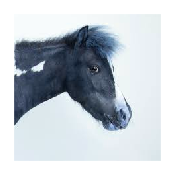

True Label: Automobile


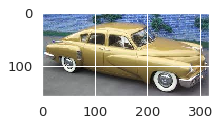

True Label: Truck


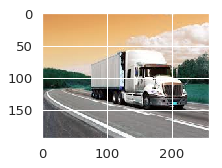

True Label: Frog


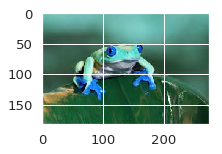

True Label: Cat


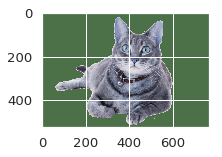

True Label: Airplane


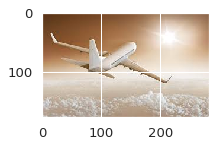

True Label: Bird


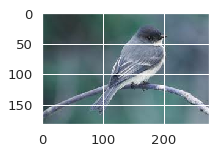

True Label: Deer


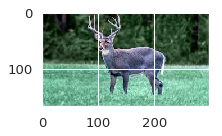

True Label: Ship


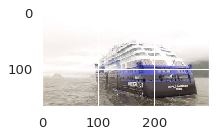

True Label: Dog


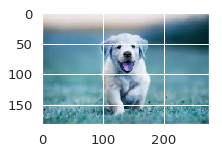

In [48]:
fig = plt.figure(figsize = (16, 6))
i = 0
for img in os.listdir("/content/cifar_new_images"):
  print("True Label:", img[:-4])
  img_path = os.path.join("/content/cifar_new_images", img)
  img_array = cv2.imread(img_path)
  ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks = [])
  plt.imshow(img_array)
  i += 1
  plt.show()

#### 2.4 Resize the images to 32 * 32 * 3 & rescale the pixel to [0, 1] by dividing 255

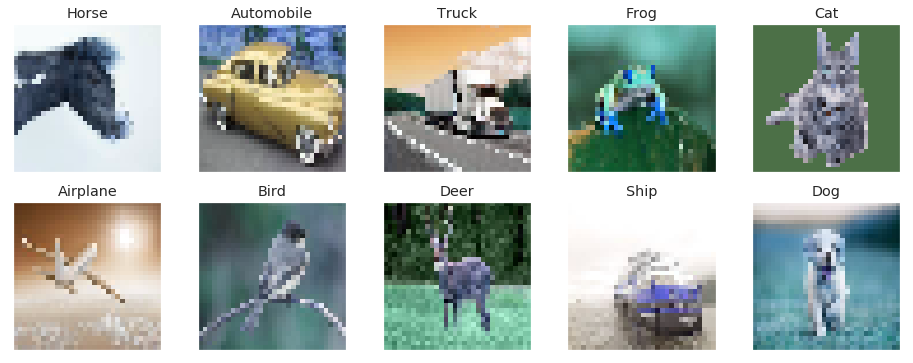

In [49]:
x_new_images = []  # create a list to store testing images vectors
y_new_labels = []
img_size = 32
fig = plt.figure(figsize = (16, 6))
i = 0
for img in os.listdir("/content/cifar_new_images"):
  img_path = os.path.join("/content/cifar_new_images", img)
  img_array = cv2.imread(img_path)
  new_array = cv2.resize(img_array, (img_size, img_size))
  x_new_images.append(new_array/255)   # rescale the image by dividing 255
  y_new_labels.append(class_names.index(img[:-4]))
  ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks = [])
  plt.title(img[:-4])
  plt.imshow(new_array)
  i += 1
plt.show()

In [50]:
# convert the list into array
x_new_images = np.asarray(x_new_images)
x_new_images.shape

(10, 32, 32, 3)

#### 2.5 Prediction

In [51]:
test_generator = test_datagen.flow(x_new_images, batch_size = 1, shuffle = False)
step_size_test = test_generator.n//test_generator.batch_size
test_generator.reset()
predictions = model_3.predict_generator(test_generator, steps = step_size_test, verbose = 1)

10/10 [==============================] - 0s 5ms/step


True Label: Horse
Prob(Automobile): 71.8715%
Prob(Airplane): 25.6405%
Prob(Horse): 1.2642%
Prob(Truck): 0.6653%
Prob(Bird): 0.2713%


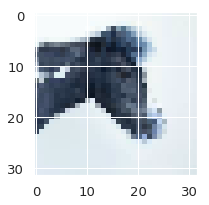

True Label: Automobile
Prob(Automobile): 88.0890%
Prob(Truck): 11.7569%
Prob(Ship): 0.1099%
Prob(Airplane): 0.0428%
Prob(Frog): 0.0013%


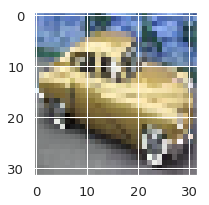

True Label: Truck
Prob(Truck): 75.0594%
Prob(Automobile): 7.4840%
Prob(Ship): 5.7469%
Prob(Airplane): 5.6451%
Prob(Frog): 3.7593%


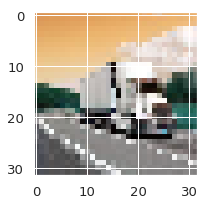

True Label: Frog
Prob(Frog): 46.8160%
Prob(Automobile): 24.2533%
Prob(Airplane): 11.2817%
Prob(Ship): 10.5416%
Prob(Bird): 3.7334%


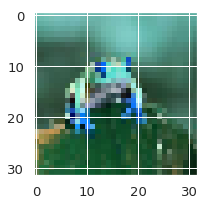

True Label: Cat
Prob(Cat): 78.1084%
Prob(Dog): 7.9654%
Prob(Horse): 6.5888%
Prob(Airplane): 6.3222%
Prob(Frog): 0.5973%


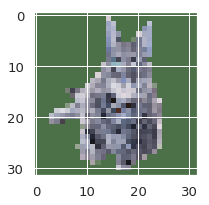

True Label: Airplane
Prob(Cat): 80.7311%
Prob(Bird): 12.1315%
Prob(Deer): 3.7604%
Prob(Airplane): 3.1326%
Prob(Dog): 0.1608%


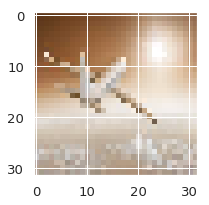

True Label: Bird
Prob(Airplane): 92.7155%
Prob(Bird): 6.1520%
Prob(Ship): 0.2463%
Prob(Frog): 0.2411%
Prob(Deer): 0.2248%


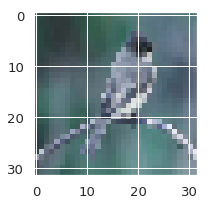

True Label: Deer
Prob(Deer): 51.2674%
Prob(Dog): 31.1528%
Prob(Bird): 11.0776%
Prob(Horse): 5.9441%
Prob(Cat): 0.5291%


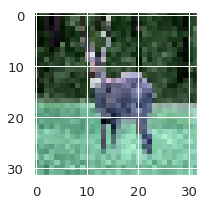

True Label: Ship
Prob(Ship): 36.9603%
Prob(Truck): 32.6886%
Prob(Automobile): 15.8422%
Prob(Airplane): 11.9199%
Prob(Frog): 1.2354%


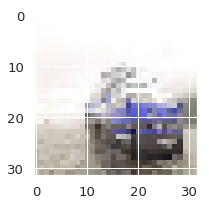

True Label: Dog
Prob(Dog): 99.6061%
Prob(Bird): 0.2897%
Prob(Cat): 0.0776%
Prob(Ship): 0.0258%
Prob(Horse): 0.0003%


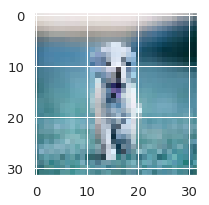

In [52]:
# class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'] # This is defined at the very begining
for i in range(x_new_images.shape[0]):
  
  
  print("True Label:", class_names[y_new_labels[i]])
  test_image = x_new_images[i]
  probabilities = predictions[i]
  #print(probabilities)
  top_5_predictions_idx = probabilities.argsort()[-5:][::-1]
  #print(top_5_predictions_idx)
  #print(probabilities)
  #print(top3_predictions_idx)
  probabilities.tolist()
  top_5_predictions_idx.tolist()
  for j in range(len(top_5_predictions_idx)):
    print("Prob({}): {:.4f}%".format(class_names[top_5_predictions_idx[j]], 100*probabilities[top_5_predictions_idx[j]]))
  plt.imshow(test_image)
  plt.show()

## Useful references:

URL_1 = “http://home.mit.bme.hu/~hadhazi/Oktatas/NN18/dem3/html_demo/CIFAR-10Demo.html”

URL_2 = "https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/"